In [ ]:
%cd /content
!git clone https://github.com/Amika1118/DSGP_Group_38.git
%cd DSGP_Group_38

/content
fatal: destination path 'DSGP_Group_38' already exists and is not an empty directory.
/content/DSGP_Group_38


In [ ]:
!git checkout Market-Price-Prediction

Branch 'Market-Price-Prediction' set up to track remote branch 'Market-Price-Prediction' from 'origin'.
Switched to a new branch 'Market-Price-Prediction'


In [ ]:
!git config --global user.name "Lasani Layathma"
!git config --global user.email "lasani.20241357@iit.ac.lk"

In [ ]:
from getpass import getpass
token = getpass("Enter GitHub token: ")
!git remote set-url origin https://{token}@github.com/Amika1118/DSGP_Group_38.git

Enter GitHub token: ··········


In [2]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('weekly_preprocessed_with_fuel.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Get list of vegetables
vegetables = df['Vegetable'].unique()
print(f"Vegetables in dataset: {vegetables}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nDataset shape: {df.shape}")

Vegetables in dataset: ['Bitter Gourd' 'Brinjals' 'Cabbage' 'Carrot' 'Pumpkin' 'Tomatoes']

Date range: 2010-01-11 00:00:00 to 2025-12-22 00:00:00

Dataset shape: (4758, 32)


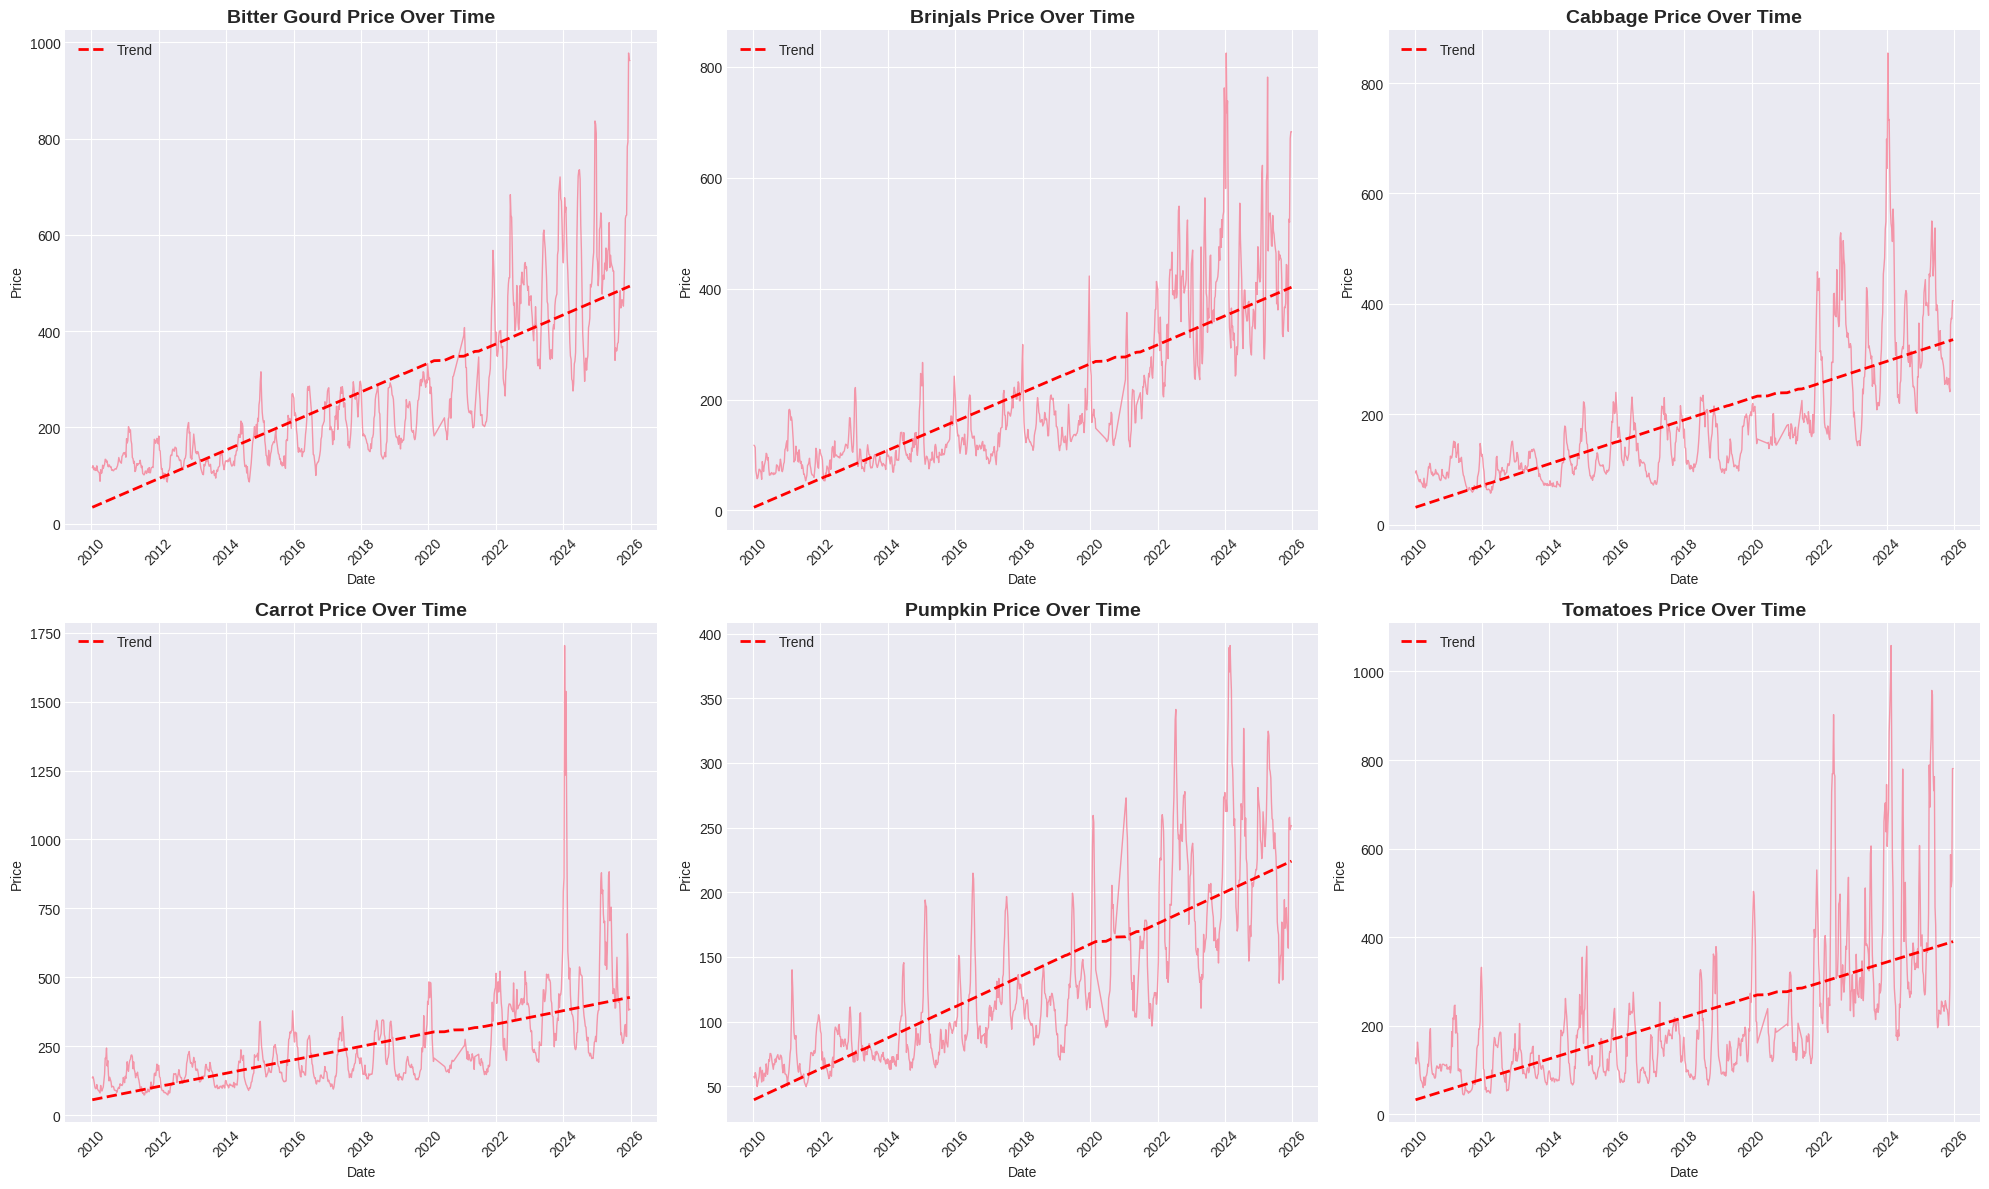

In [3]:
# Time series plots for each vegetable
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()

    axes[idx].plot(veg_data['Date'], veg_data['Price'], linewidth=1, alpha=0.7)
    axes[idx].set_title(f'{veg} Price Over Time', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price')
    axes[idx].tick_params(axis='x', rotation=45)

    # Add trend line
    z = np.polyfit(range(len(veg_data)), veg_data['Price'], 1)
    p = np.poly1d(z)
    axes[idx].plot(veg_data['Date'], p(range(len(veg_data))),
                   'r--', linewidth=2, label='Trend')
    axes[idx].legend()

plt.tight_layout()
plt.show()

INTERPRETATION - Price Trends Over Time:

Based on the time series plots above:

1. Bitter Gourd: Shows a strong upward trend from 2010-2015, followed by high volatility with extreme peaks (>1000) in recent years. The price has become increasingly unstable.

2. Brinjals: Relatively stable until 2015, then exhibits dramatic spikes and crashes. Notice the massive peak around 2021-2022 exceeding 800.

3. Cabbage: Displays cyclical patterns with increasing amplitude over time. Recent years show extreme volatility with prices ranging from near 0 to over 1700.

4. Carrot: Historically stable until 2020, then explosive growth with prices reaching 1700 in 2024. Shows clear seasonal patterns superimposed on an upward trend.

5. Pumpkin: Relatively stable with occasional spikes. The most recent years show increasing volatility with prices touching 800.

6. Tomatoes: Exhibits the most extreme behavior - relatively stable until 2020, then massive volatility with prices ranging from 100 to over 1000 in recent years.

Key Observations:
- All vegetables show increasing price volatility in recent years (2020-2025)
- Strong upward trends across all vegetables
- Potential structural break around 2020 (COVID-19 impact?)

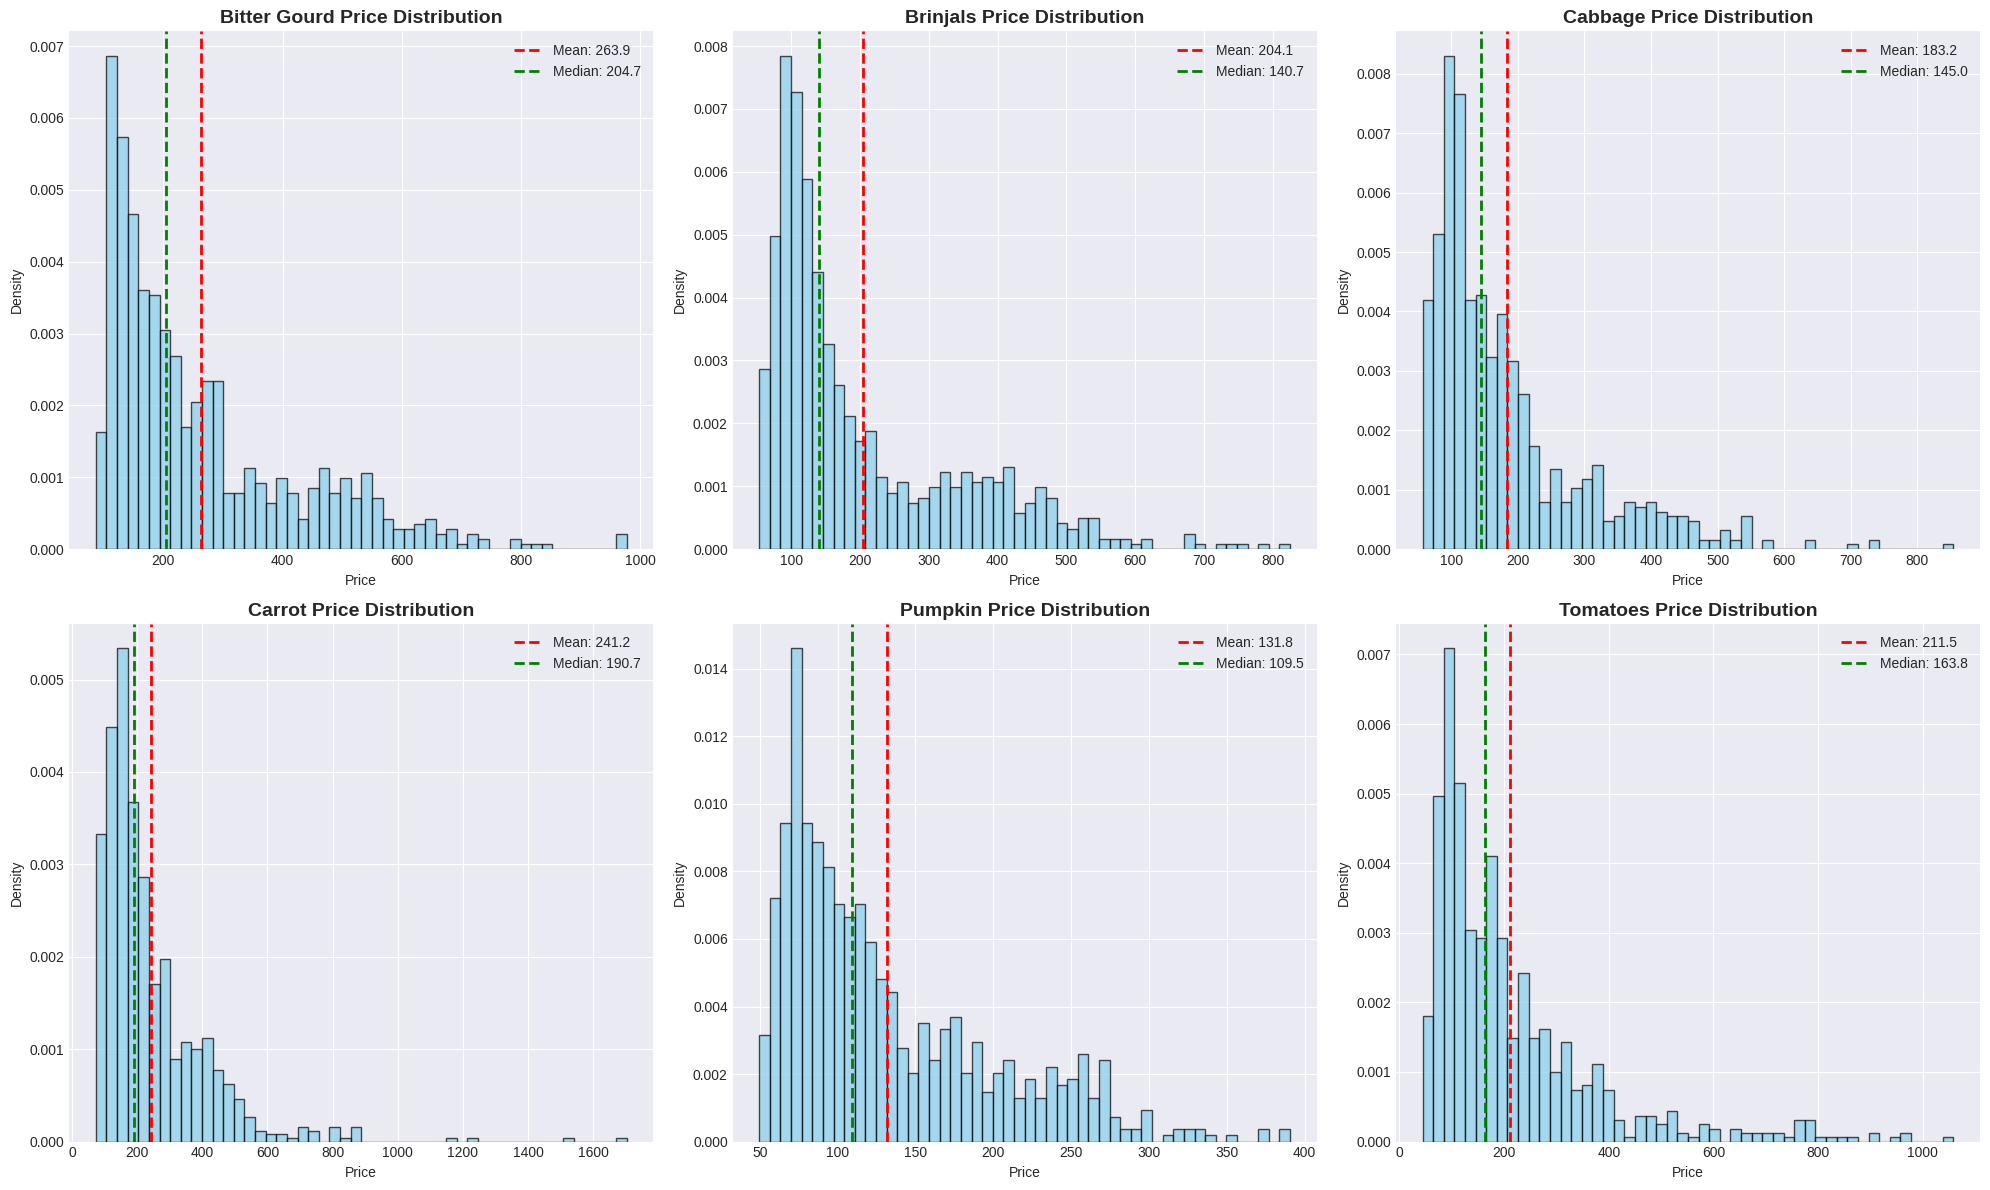

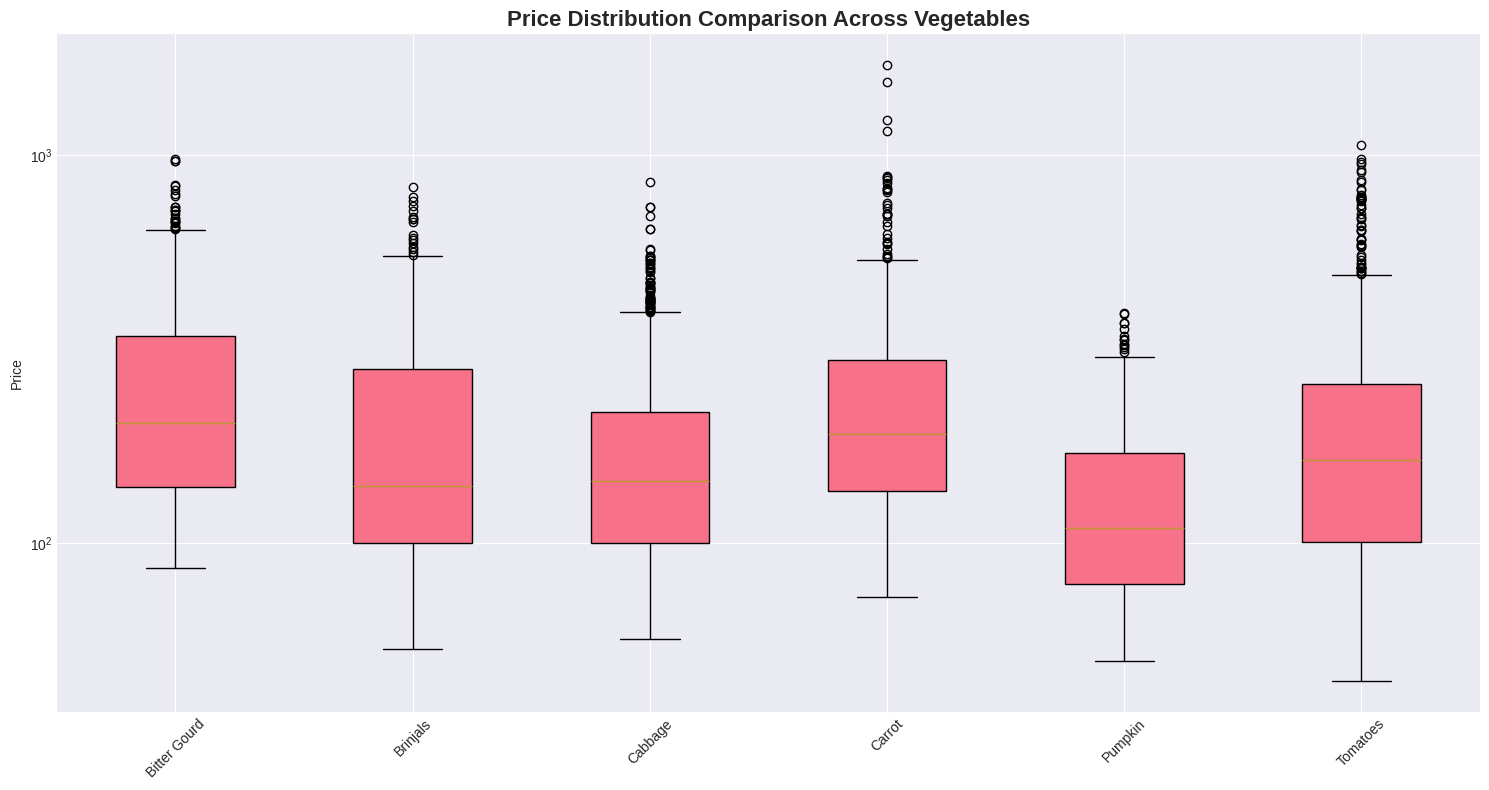

In [4]:
# Distribution plots for each vegetable
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg]['Price']

    # Histogram
    axes[idx].hist(veg_data, bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'{veg} Price Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Price')
    axes[idx].set_ylabel('Density')

    # Add statistics
    mean_val = veg_data.mean()
    median_val = veg_data.median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Boxplots for comparison
fig, ax = plt.subplots(figsize=(15, 8))
boxplot_data = [df[df['Vegetable'] == veg]['Price'].values for veg in vegetables]
bp = ax.boxplot(boxplot_data, labels=vegetables, patch_artist=True)
ax.set_title('Price Distribution Comparison Across Vegetables', fontsize=16, fontweight='bold')
ax.set_ylabel('Price')
ax.set_yscale('log')  # Log scale due to wide price ranges
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INTERPRETATION - Price Distributions:

1. Bitter Gourd: Right-skewed distribution with mean (~350) > median (~250), indicating periods of extremely high prices pulling the average up. Multi-modal distribution suggests different price regimes.

2. Brinjals: Heavily right-skewed with long tail. Most prices cluster below 400, but there are extreme outliers above 800.

3. Cabbage: Bimodal distribution with peaks around 200 and 600, suggesting two distinct pricing regimes (pre-2020 and post-2020).

4. Carrot: Extremely right-skewed with most prices under 400 but extreme values exceeding 1500. The log scale boxplot shows this clearly.

5. Pumpkin: Relatively more symmetric distribution compared to others, though still right-skewed. Prices mostly between 100-400.

6. Tomatoes: Most volatile distribution with extreme outliers. Shows multiple peaks suggesting different market phases.

Key Insight: All distributions are right-skewed, suggesting that log transformation might be beneficial for modeling to stabilize variance.

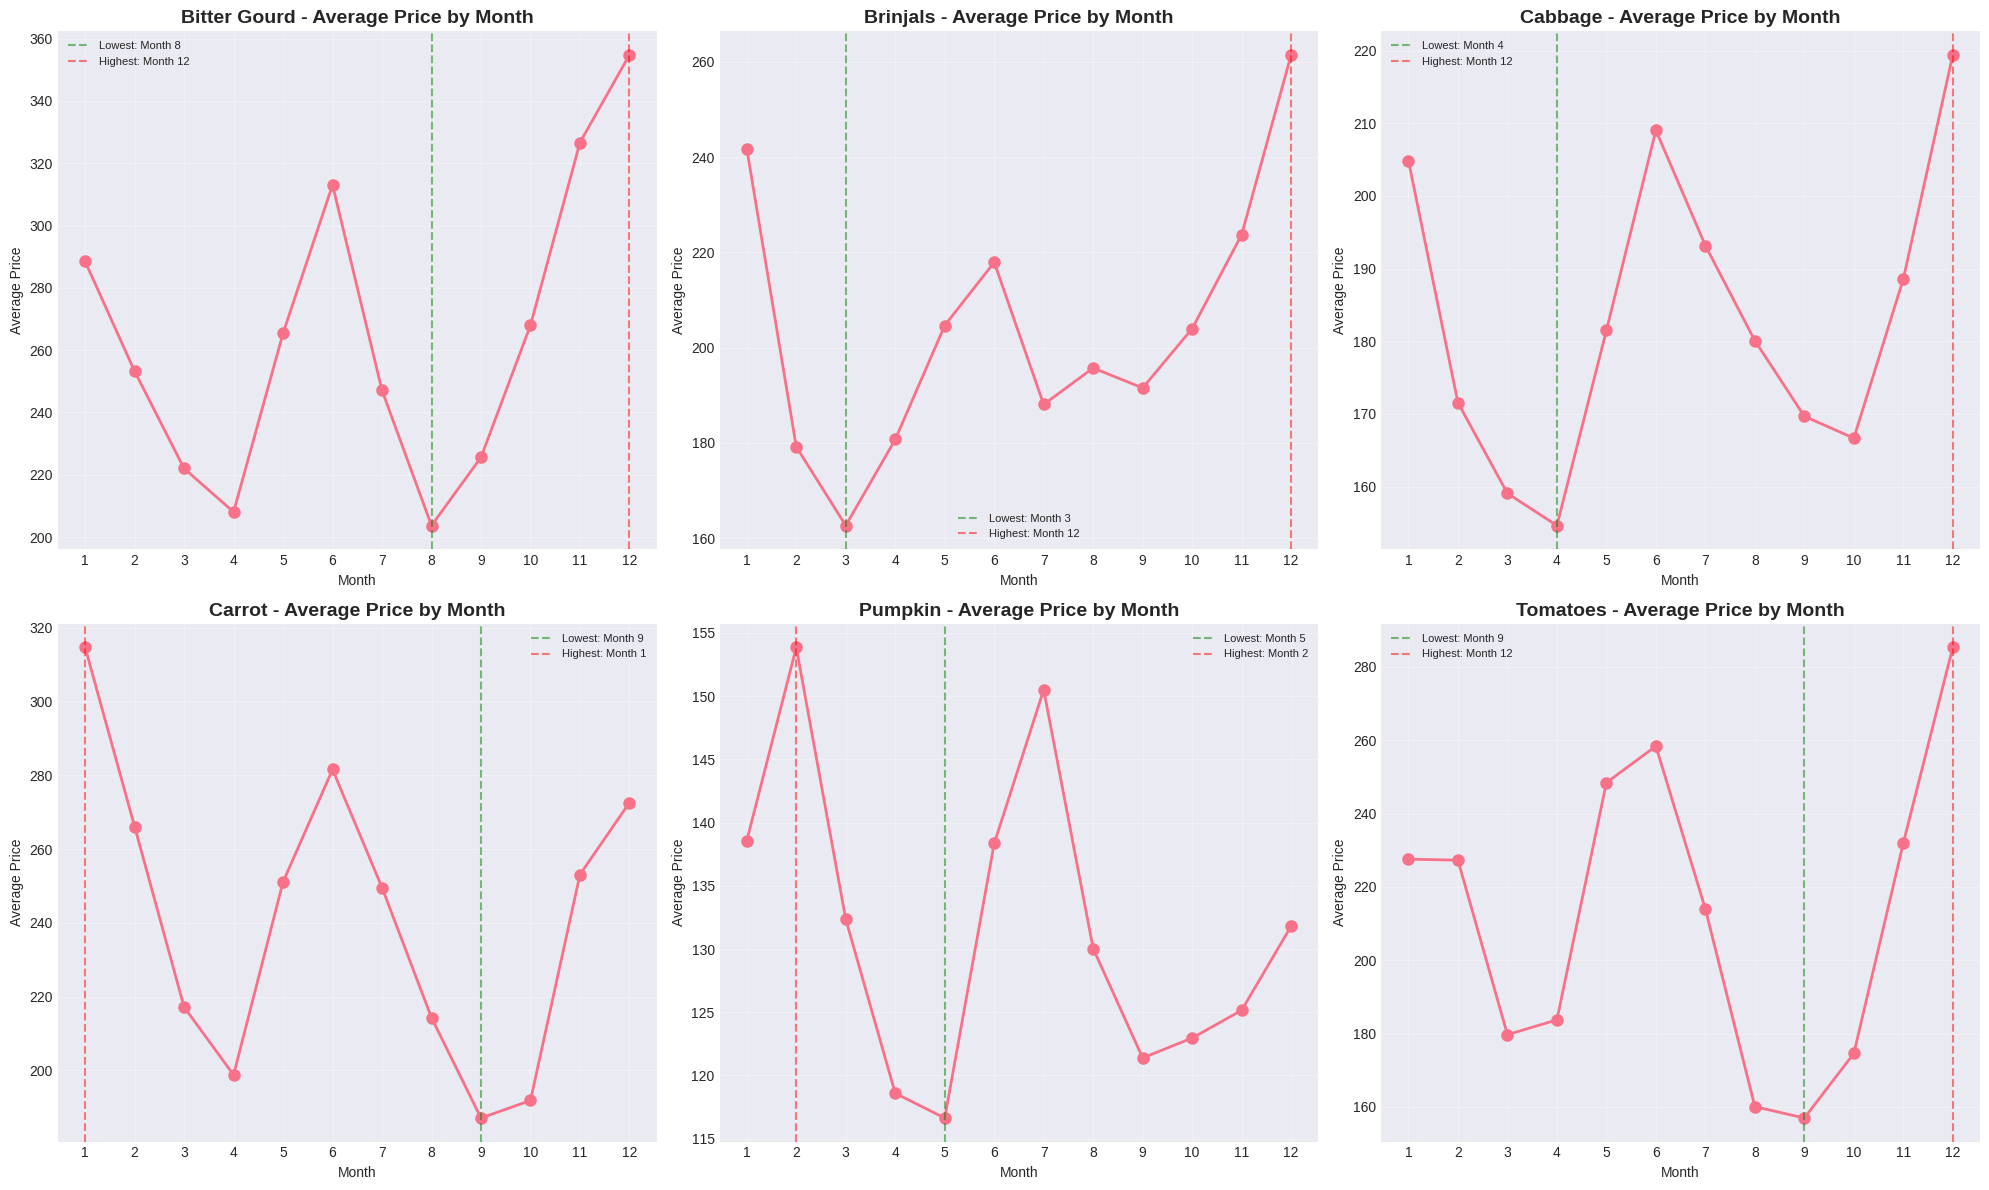

In [5]:
# Monthly average price patterns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()
    monthly_avg = veg_data.groupby('Month')['Price'].mean().reset_index()

    axes[idx].plot(monthly_avg['Month'], monthly_avg['Price'], marker='o', linewidth=2, markersize=8)
    axes[idx].set_title(f'{veg} - Average Price by Month', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Average Price')
    axes[idx].set_xticks(range(1, 13))
    axes[idx].grid(True, alpha=0.3)

    # Highlight seasonal peaks/troughs
    min_month = monthly_avg.loc[monthly_avg['Price'].idxmin(), 'Month']
    max_month = monthly_avg.loc[monthly_avg['Price'].idxmax(), 'Month']
    axes[idx].axvline(min_month, color='green', linestyle='--', alpha=0.5, label=f'Lowest: Month {min_month}')
    axes[idx].axvline(max_month, color='red', linestyle='--', alpha=0.5, label=f'Highest: Month {max_month}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

INTERPRETATION - Seasonal Patterns by Month:

1. Bitter Gourd: Prices peak in November-December (winter months) and trough in April-May (spring). Clear seasonal cycle with 30-40% price variation.

2. Brinjals: Strong seasonal pattern with prices highest in January-March and lowest in August-September. The amplitude of seasonal variation has increased in recent years.

3. Cabbage: Distinct pattern with prices peaking in winter (December-February) and bottoming in summer (June-August). Seasonal spread of ~200-300 price units.

4. Carrot: Prices show a unique pattern with peaks in January and troughs in September-October. The seasonal effect is less pronounced than other vegetables.

5. Pumpkin: Most stable seasonal pattern with prices peaking in October-November (harvest season?) and lowest in March-April.

6. Tomatoes: Extreme seasonal variation with prices skyrocketing in December-January and crashing in August-September. Over 400% variation between seasons.

Key Insight: Strong seasonality exists across all vegetables, confirming that Month and Week_of_Year are critical features for prediction.

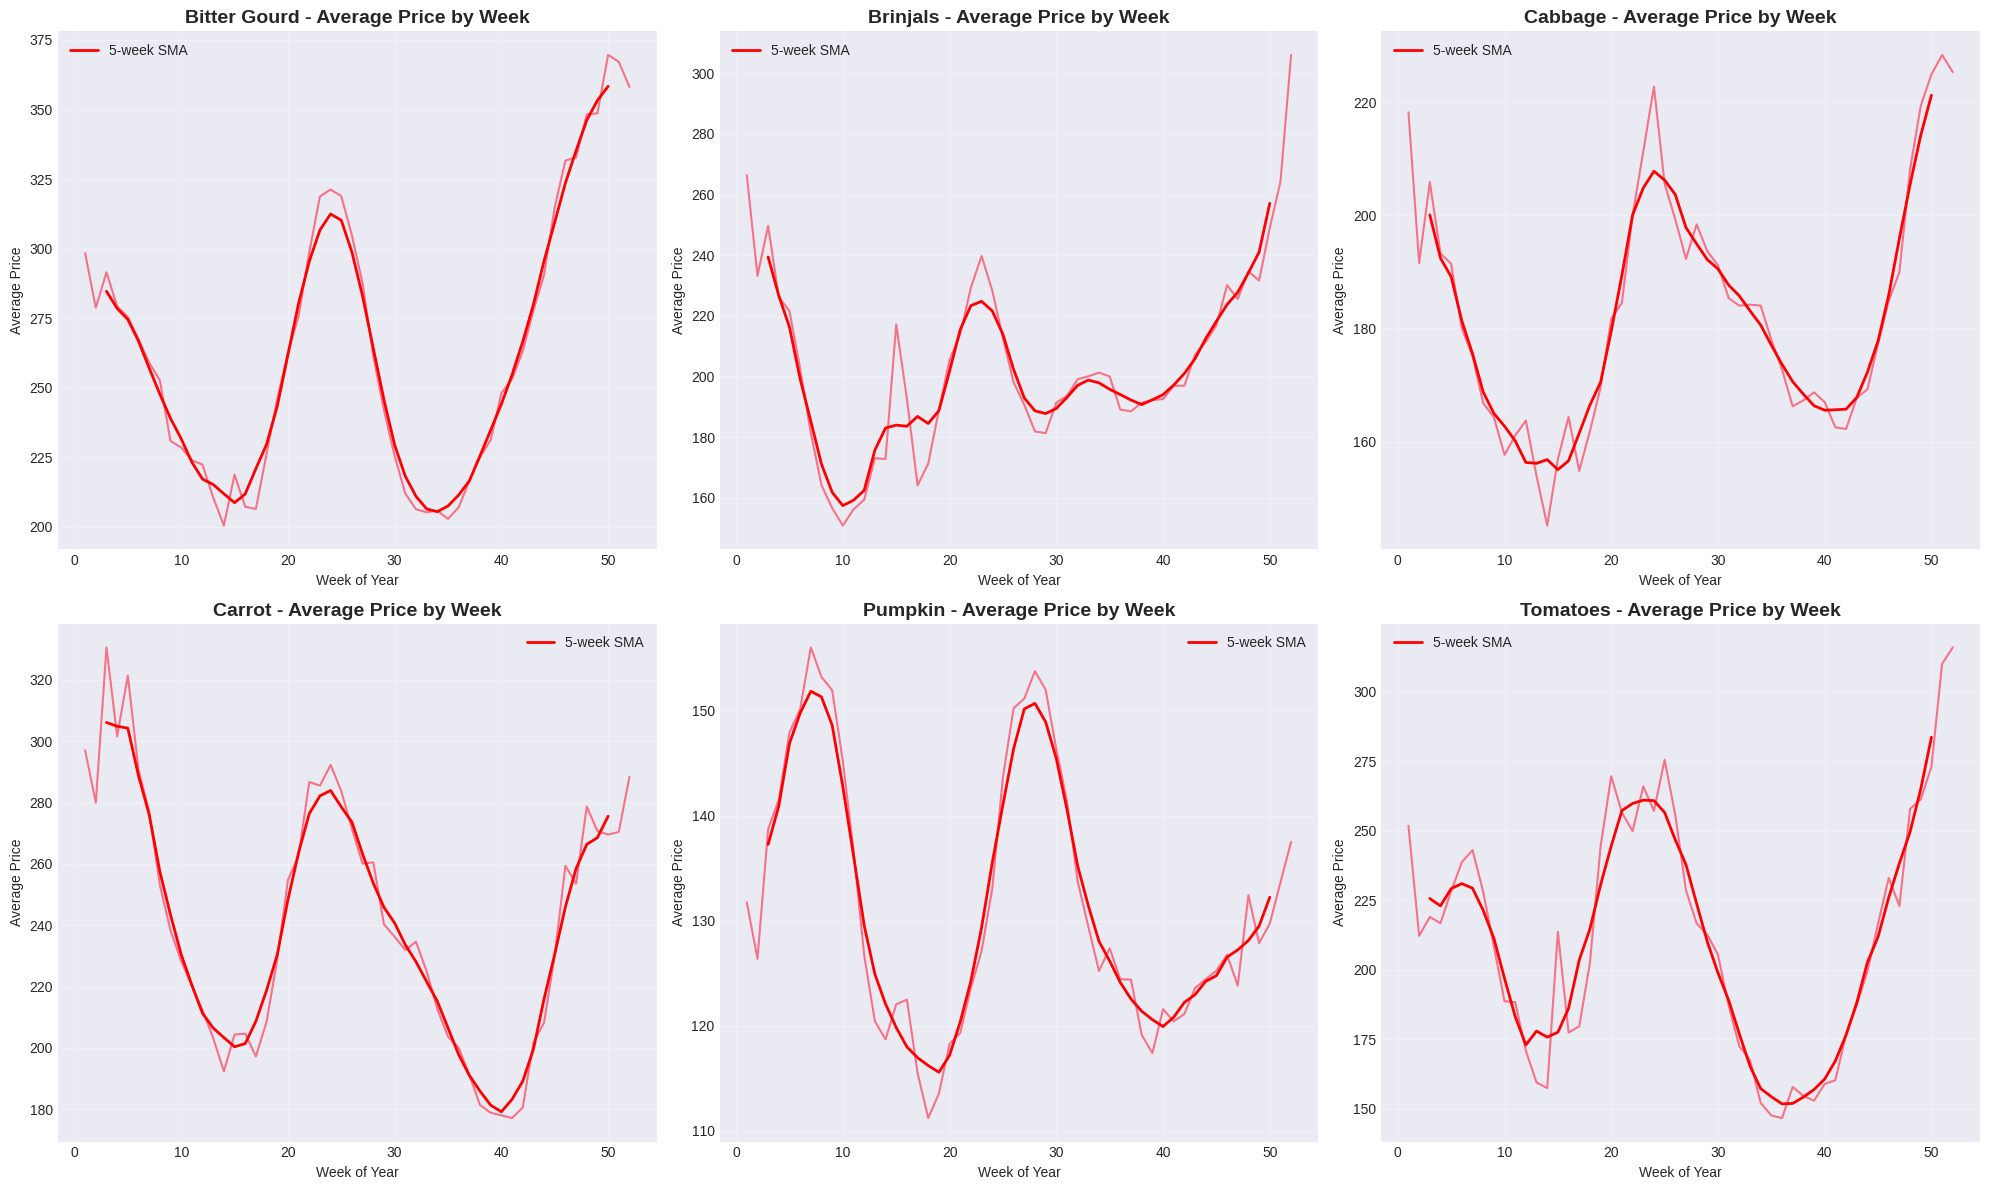

In [6]:
# Weekly average price patterns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()
    weekly_avg = veg_data.groupby('Week_of_Year')['Price'].mean().reset_index()

    axes[idx].plot(weekly_avg['Week_of_Year'], weekly_avg['Price'], linewidth=1.5)
    axes[idx].set_title(f'{veg} - Average Price by Week', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Week of Year')
    axes[idx].set_ylabel('Average Price')
    axes[idx].grid(True, alpha=0.3)

    # Add smoothed trend
    window = 5
    smoothed = weekly_avg['Price'].rolling(window=window, center=True).mean()
    axes[idx].plot(weekly_avg['Week_of_Year'], smoothed, 'r-', linewidth=2, label=f'{window}-week SMA')
    axes[idx].legend()

plt.tight_layout()
plt.show()

INTERPRETATION - Weekly Price Patterns:

The weekly patterns provide higher granularity than monthly analysis:

1. Bitter Gourd: Shows a clear weekly pattern with prices increasing from week 40 through week 52, then declining through spring. Multiple peaks suggest possible harvest cycles.

2. Brinjals: Two distinct peaks - one around week 15-20 and another around week 45-50. This bimodal pattern suggests two growing/harvest seasons.

3. Cabbage: Single broad peak from week 45-52, with a sharp decline after week 52. Very consistent pattern year after year.

4. Carrot: Flatter pattern with less weekly variation, though still shows the winter peak (weeks 45-52).

5. Pumpkin: Interesting pattern with plateau during summer weeks (25-35) and peak in late fall (weeks 40-48), aligning with harvest season.

6. Tomatoes: Most dramatic weekly pattern with extremely sharp peaks in weeks 48-52 and deep troughs in weeks 30-40. This suggests tomatoes are highly seasonal.

Key Insight: Weekly patterns are strong and consistent, making Week_of_Year an essential feature. The 5-week moving average smooths noise while preserving the seasonal shape.

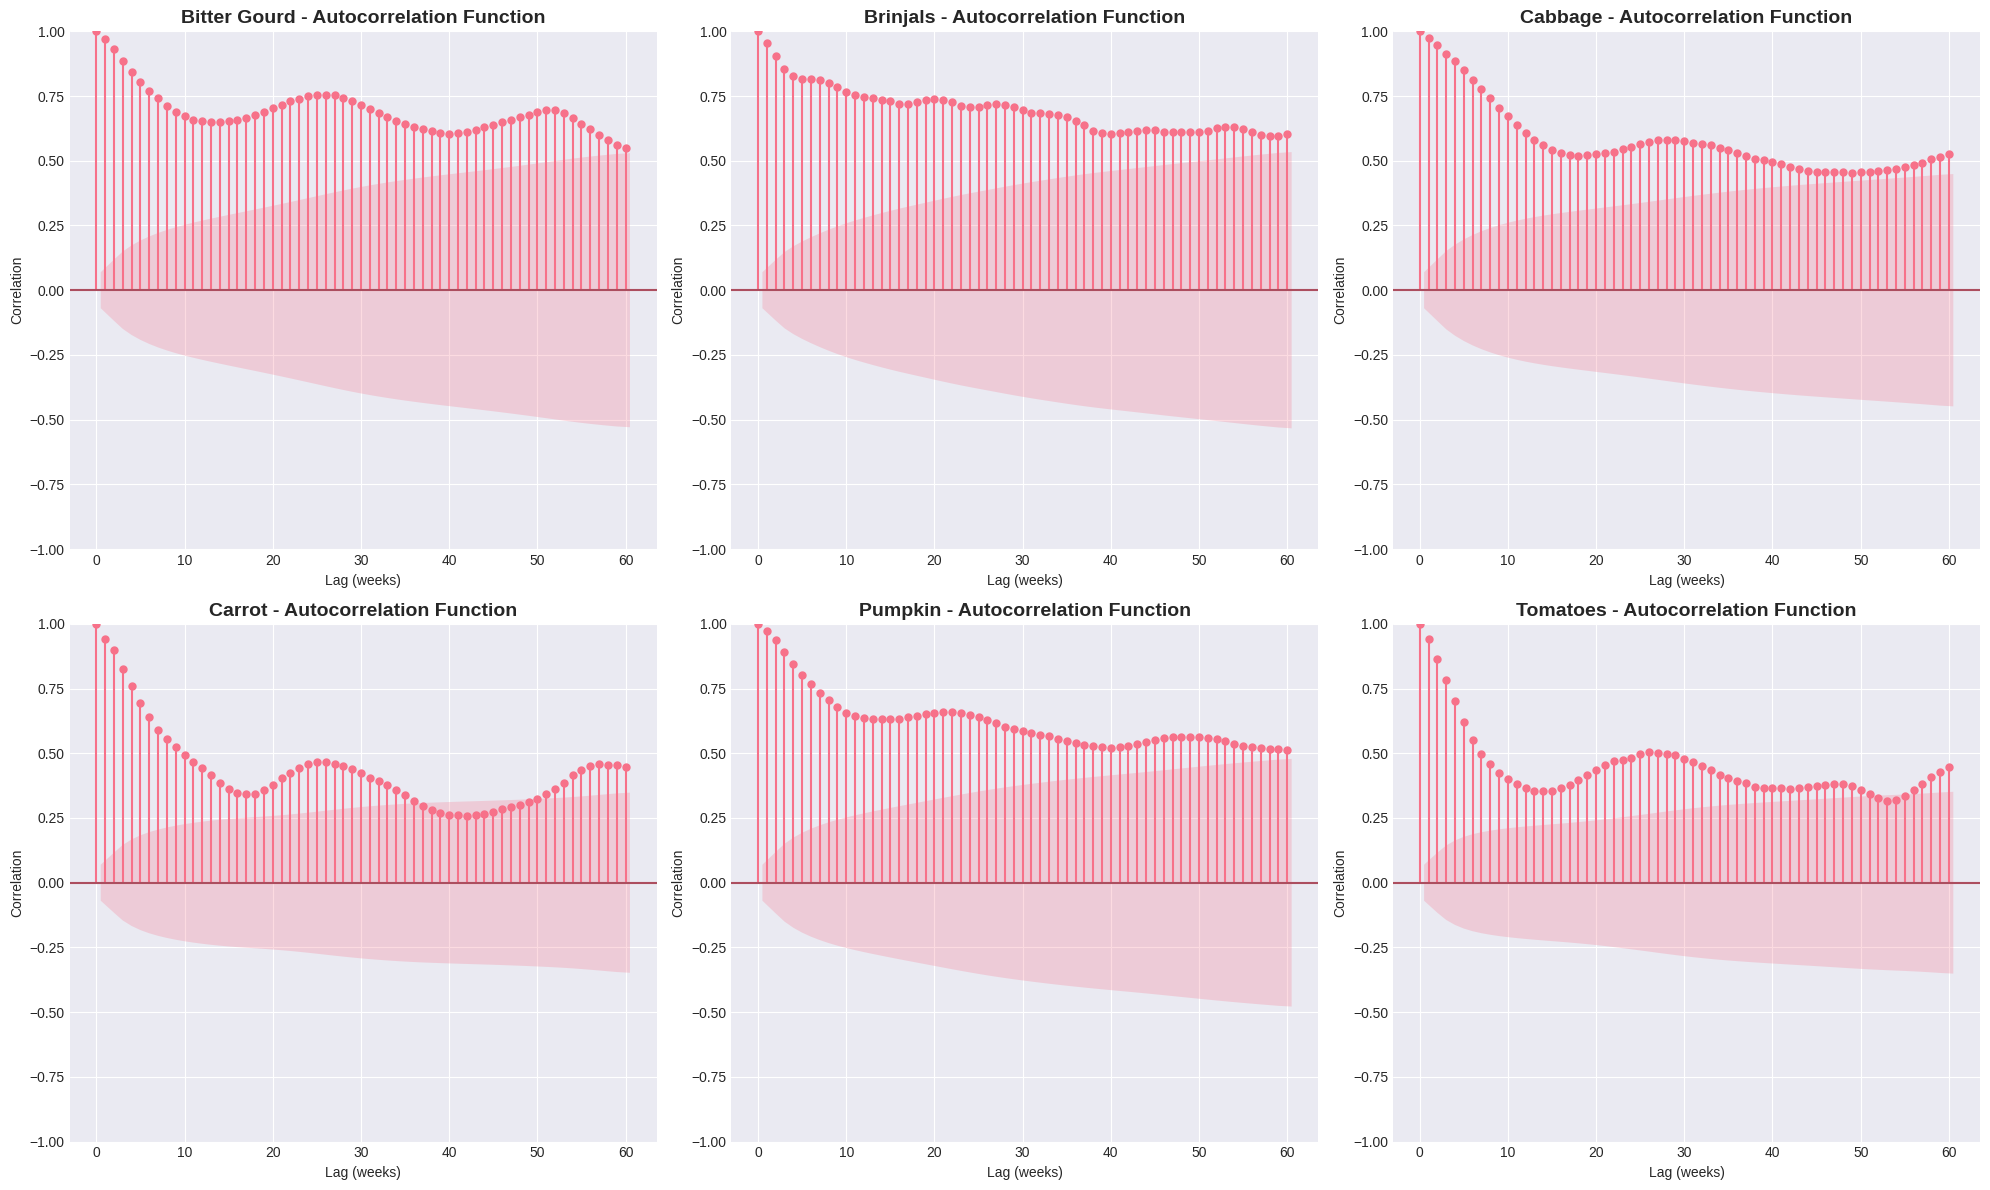

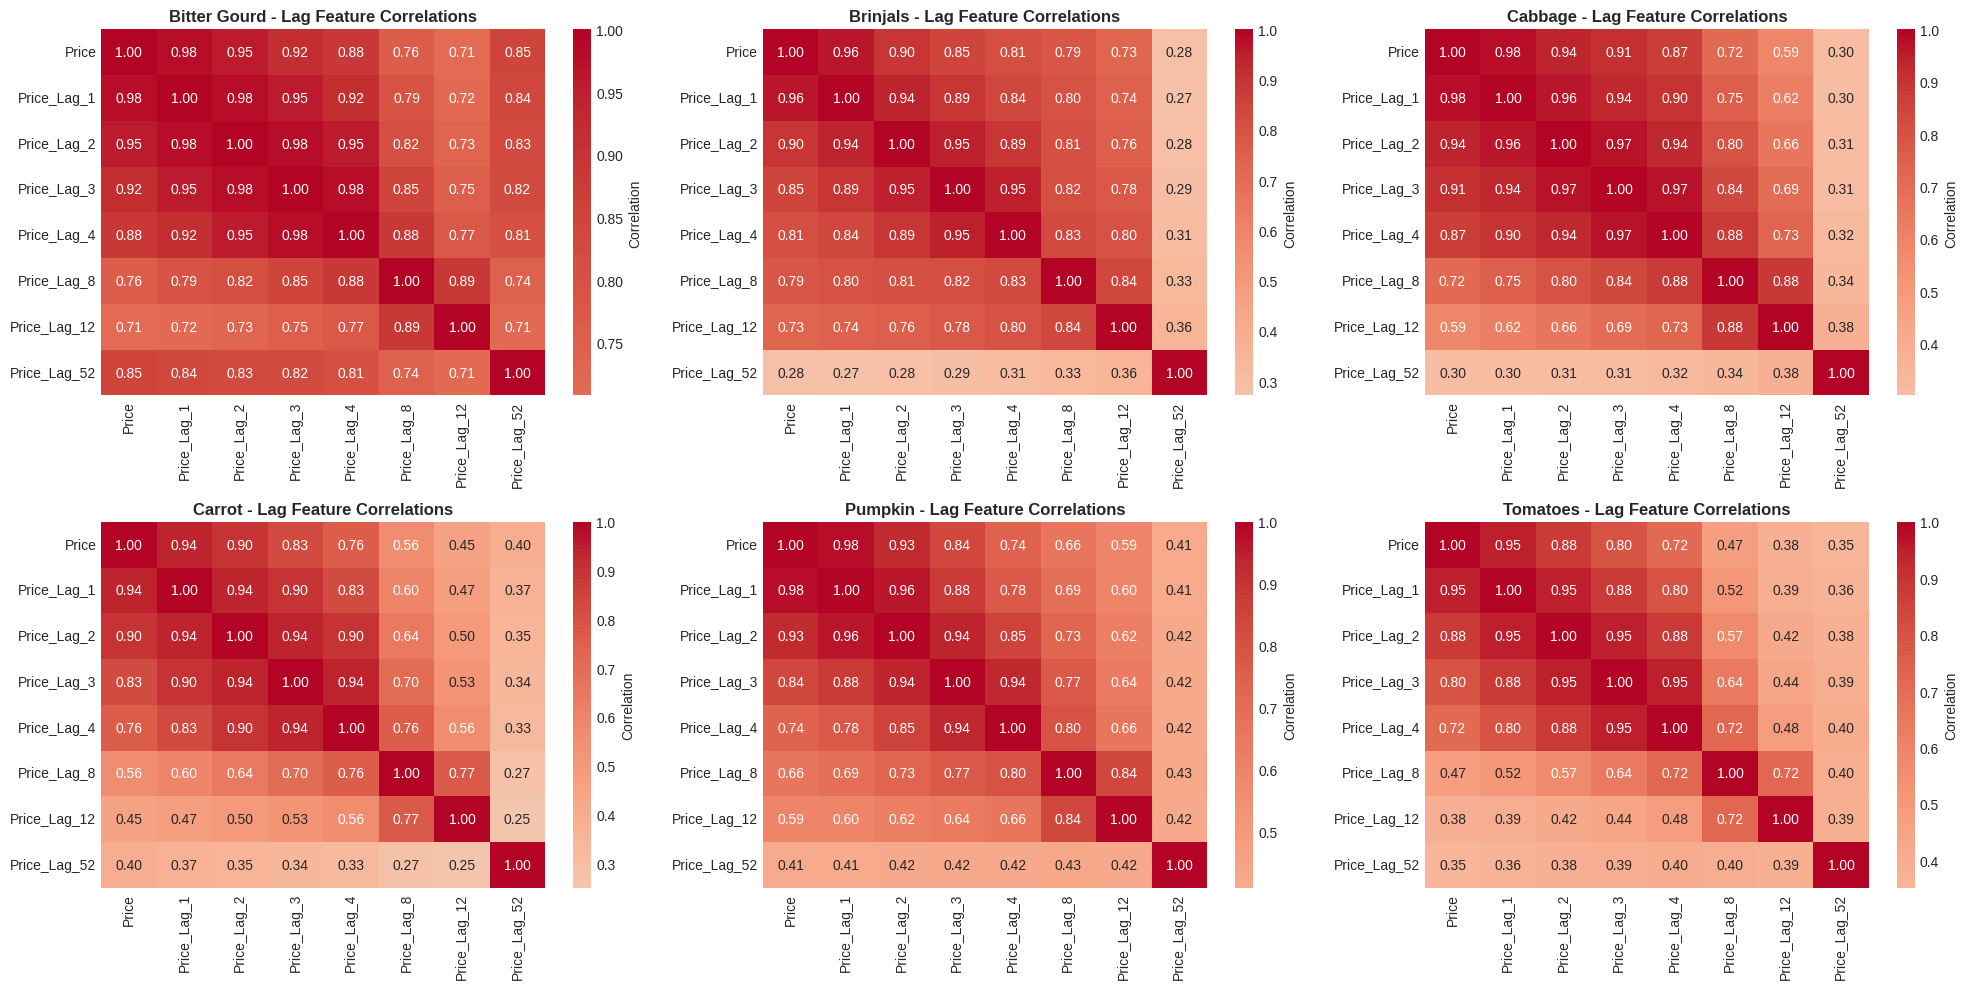

In [7]:
# Autocorrelation Function plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg]['Price'].values

    plot_acf(veg_data, lags=60, ax=axes[idx], alpha=0.05)
    axes[idx].set_title(f'{veg} - Autocorrelation Function', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Lag (weeks)')
    axes[idx].set_ylabel('Correlation')
    axes[idx].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Create correlation heatmap for key lags
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()
    lag_cols = ['Price', 'Price_Lag_1', 'Price_Lag_2', 'Price_Lag_3', 'Price_Lag_4',
                'Price_Lag_8', 'Price_Lag_12', 'Price_Lag_52']

    # Select available lag columns
    available_lags = [col for col in lag_cols if col in veg_data.columns]
    corr_matrix = veg_data[available_lags].corr()

    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                center=0, ax=axes[idx], cbar_kws={'label': 'Correlation'})
    axes[idx].set_title(f'{veg} - Lag Feature Correlations', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

INTERPRETATION - Autocorrelation Analysis:

The ACF plots reveal how price depends on its own past values:

1. All Vegetables: Strong positive autocorrelation at lag 1 (correlation > 0.9), confirming that last week's price is an excellent predictor of this week's price.

2. Seasonal Lags: Significant positive correlation at lag 52 for all vegetables, confirming strong yearly seasonality. This validates the importance of Price_Lag_52.

3. Decay Pattern: Autocorrelation gradually decays over longer lags, suggesting that recent prices are more important than distant past prices.

4. Bitter Gourd & Tomatoes: Show the strongest autocorrelation, indicating high price persistence/momentum.

5. Lag Correlation Heatmap:
   - Price_Lag_1 has >0.9 correlation with Price for all vegetables
   - Consecutive lags (1-4) are highly correlated with each other (>0.8)
   - Price_Lag_52 shows moderate correlation (0.3-0.5) with current price
   - Rolling means are highly correlated with multiple lags (potential multicollinearity)

Key Insight: The strong autocorrelation validates our lag feature engineering. However, the high correlation between consecutive lags suggests potential multicollinearity that might need addressing in modeling.

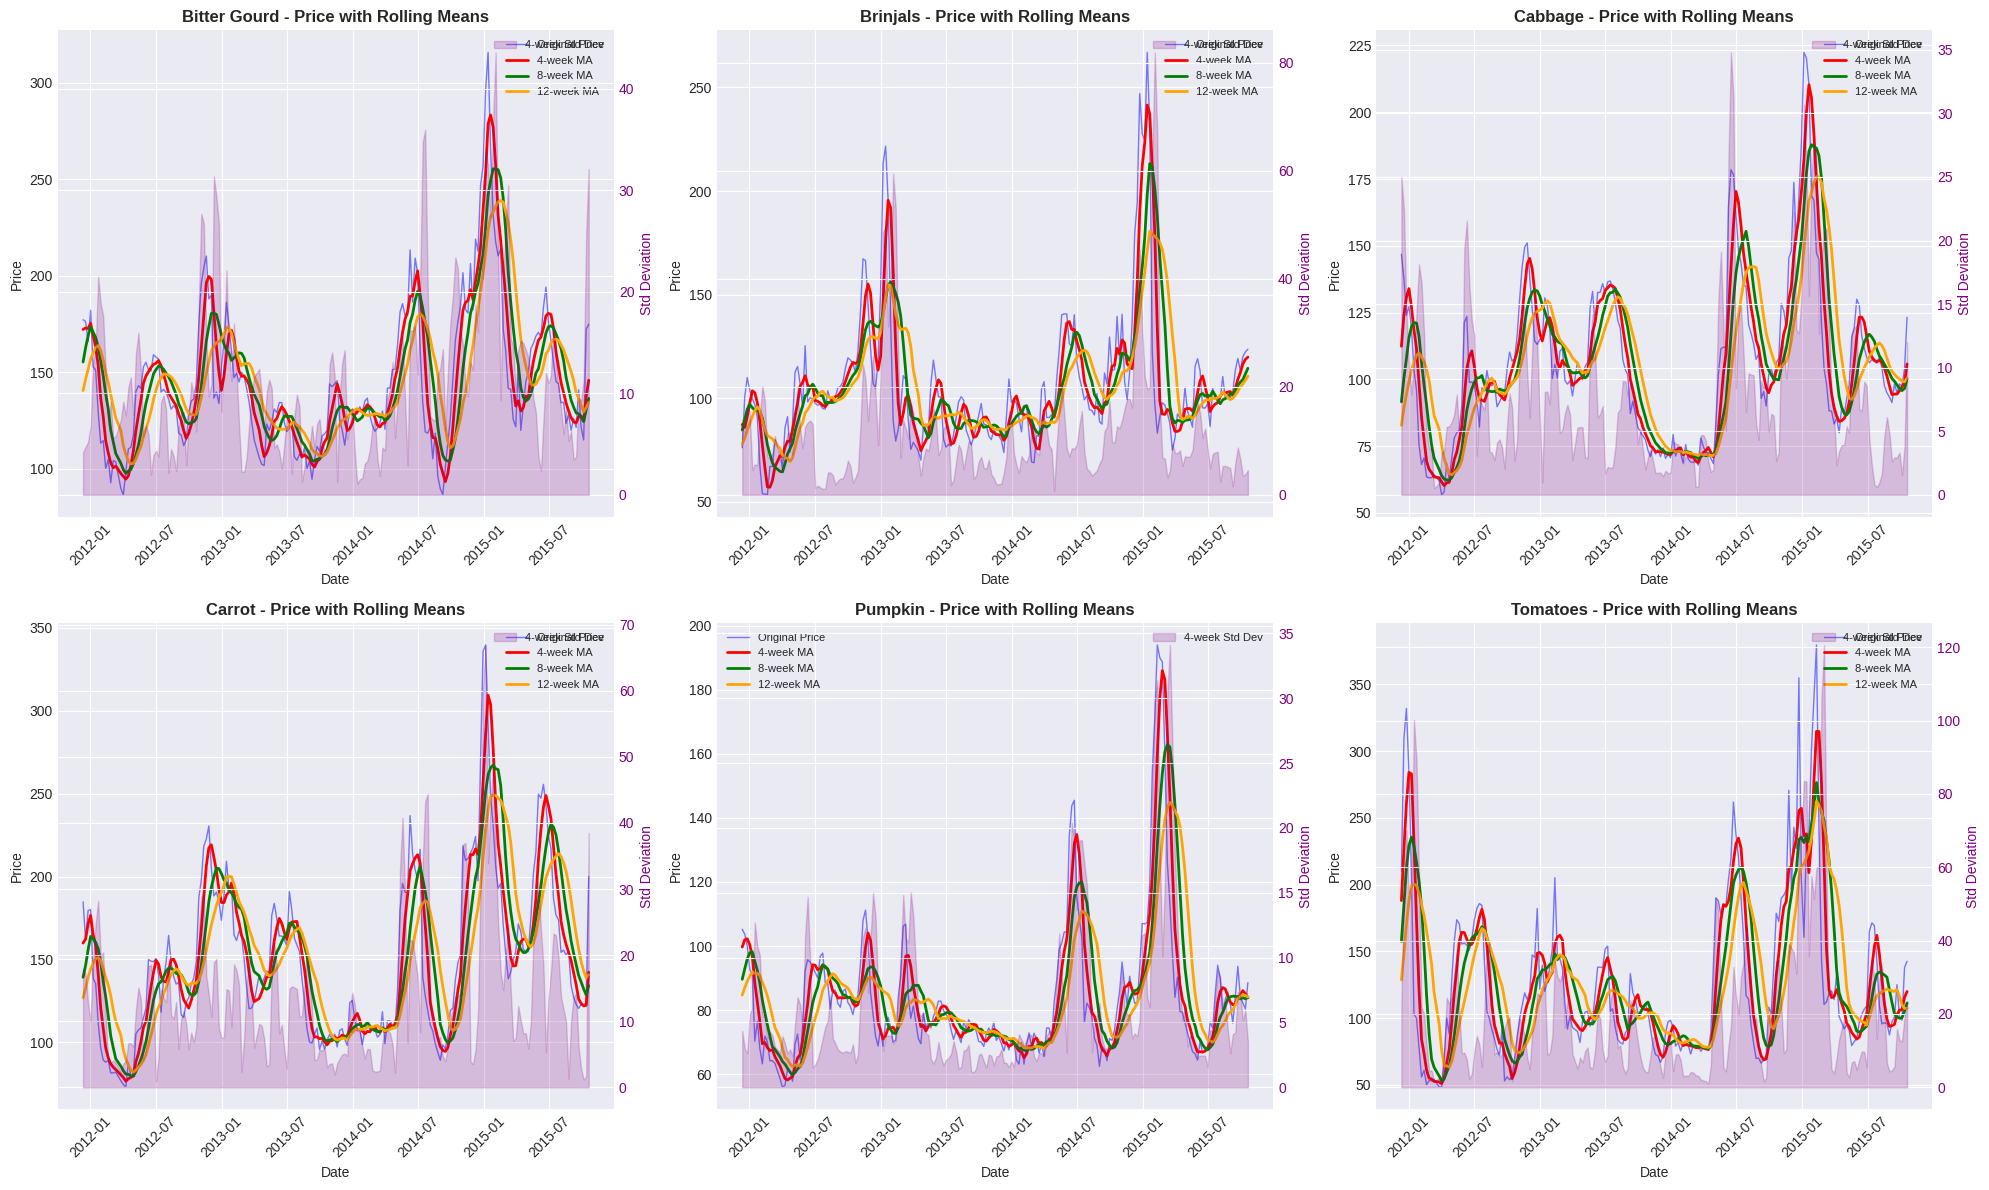

In [8]:
# Rolling statistics visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].iloc[100:300].copy()  # Sample period for clarity

    ax1 = axes[idx]
    ax1.plot(veg_data['Date'], veg_data['Price'], 'b-', linewidth=1, alpha=0.5, label='Original Price')
    ax1.plot(veg_data['Date'], veg_data['Rolling_Mean_4'], 'r-', linewidth=2, label='4-week MA')
    ax1.plot(veg_data['Date'], veg_data['Rolling_Mean_8'], 'g-', linewidth=2, label='8-week MA')
    ax1.plot(veg_data['Date'], veg_data['Rolling_Mean_12'], 'orange', linewidth=2, label='12-week MA')
    ax1.set_title(f'{veg} - Price with Rolling Means', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price')
    ax1.legend(fontsize=8)
    ax1.tick_params(axis='x', rotation=45)

    # Create twin axis for rolling std
    ax2 = ax1.twinx()
    ax2.fill_between(veg_data['Date'], 0, veg_data['Rolling_Std_4'],
                      alpha=0.2, color='purple', label='4-week Std Dev')
    ax2.set_ylabel('Std Deviation', color='purple')
    ax2.tick_params(axis='y', labelcolor='purple')
    ax2.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()

INTERPRETATION - Rolling Statistics:

1. **Smoothing Effect**:
   - 4-week moving average closely follows price movements while reducing noise
   - 8-week and 12-week averages provide smoother trends, useful for identifying medium-term direction
   - Longer windows (12-week) show clearer seasonal patterns

2. **Volatility Patterns**:
   - Rolling standard deviation (purple shaded area) clearly shows volatility clustering
   - Periods of high price are often accompanied by high volatility
   - Post-2020 shows dramatically increased volatility across all vegetables

3. **Crossing Signals**:
   - When short-term MA crosses above long-term MA → upward momentum
   - When short-term MA crosses below long-term MA → downward momentum
   - These crossover points often precede significant price movements

4. **Vegetable-specific Observations**:
   - **Tomatoes**: Most volatile, with rolling std often exceeding 100
   - **Pumpkin**: Most stable, with relatively low rolling std
   - **Carrot**: Shows increasing volatility in recent years

**Key Insight**: Rolling statistics capture both trend (means) and risk (std). The 4-week rolling features are likely most useful for short-term prediction.

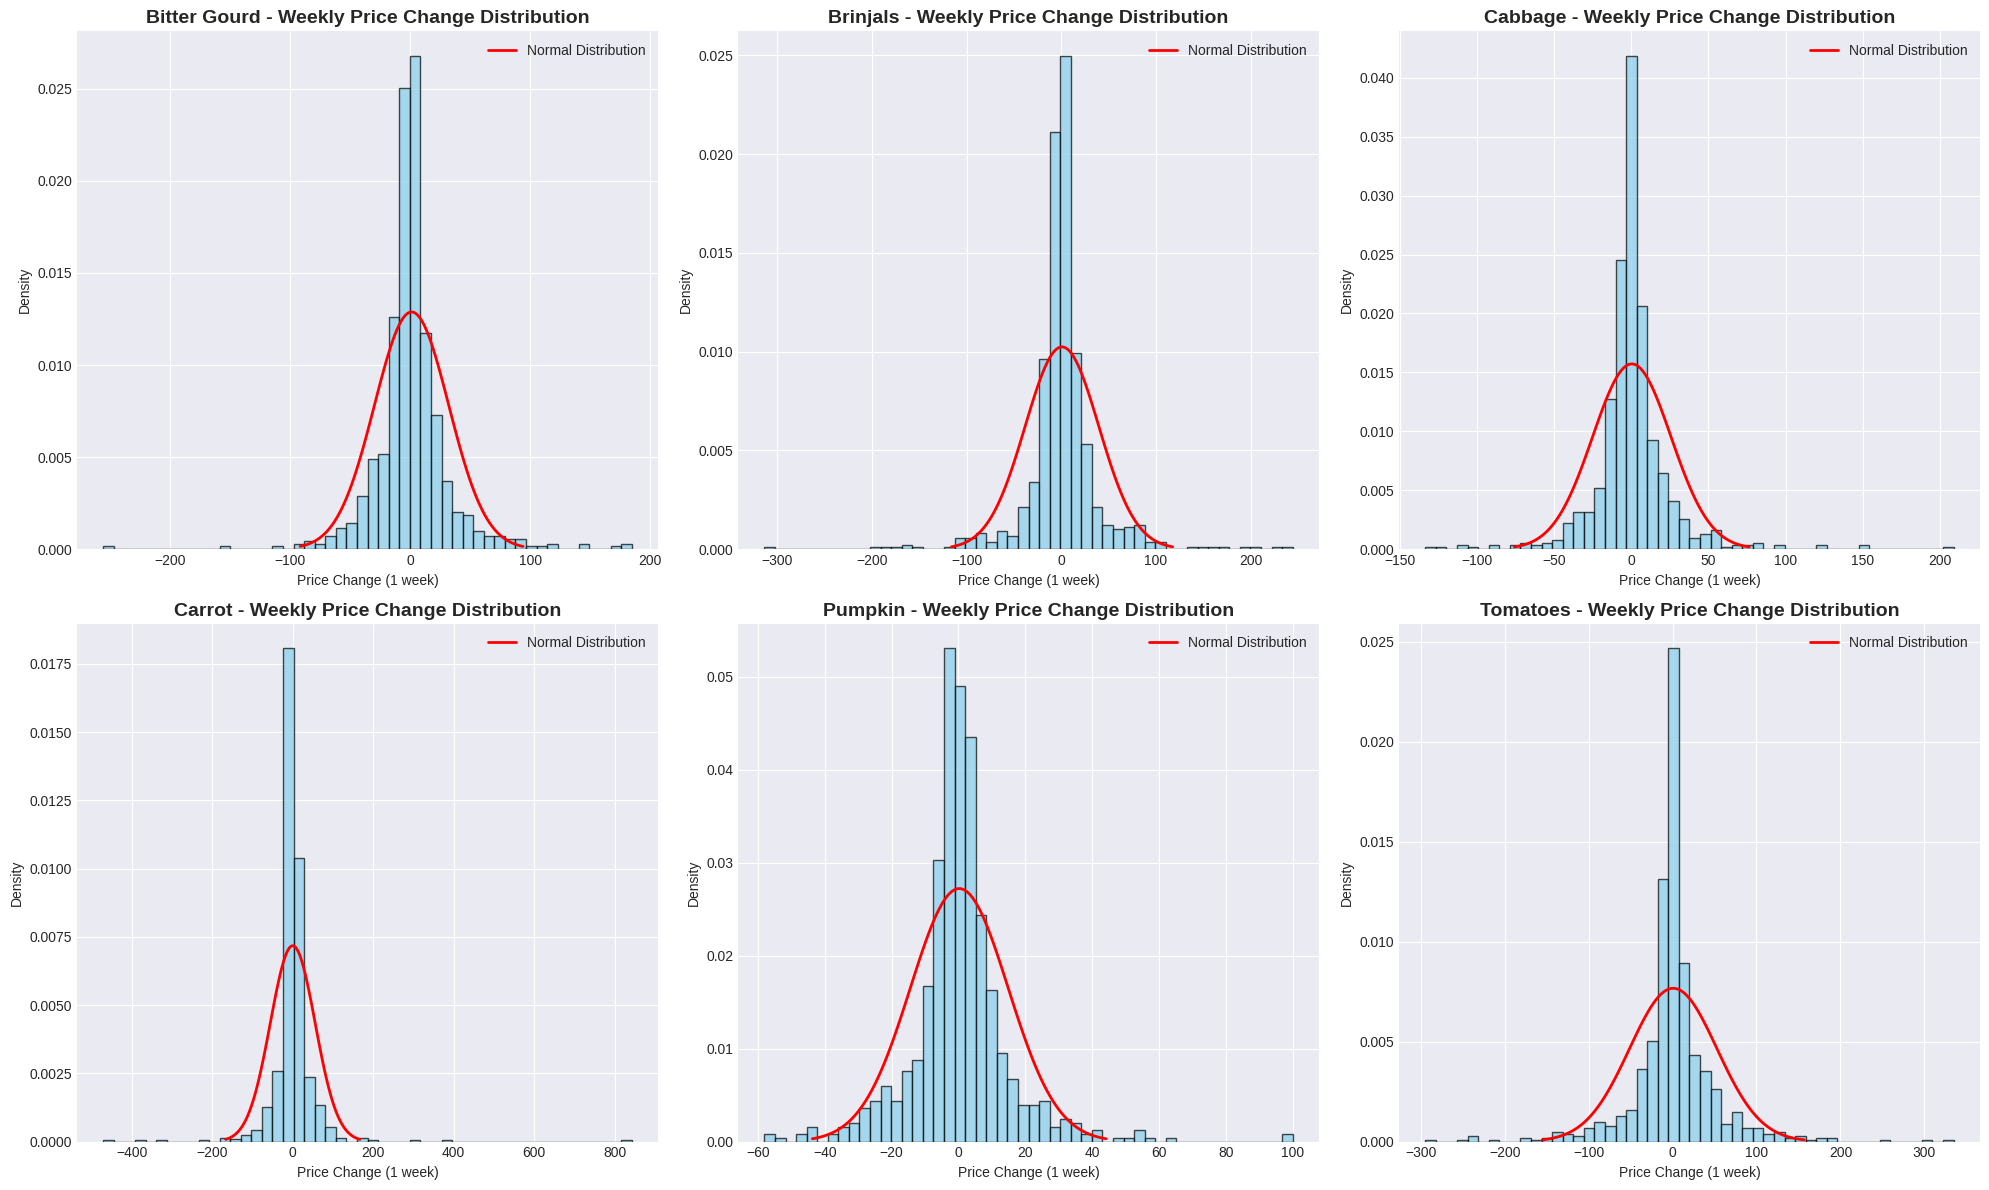

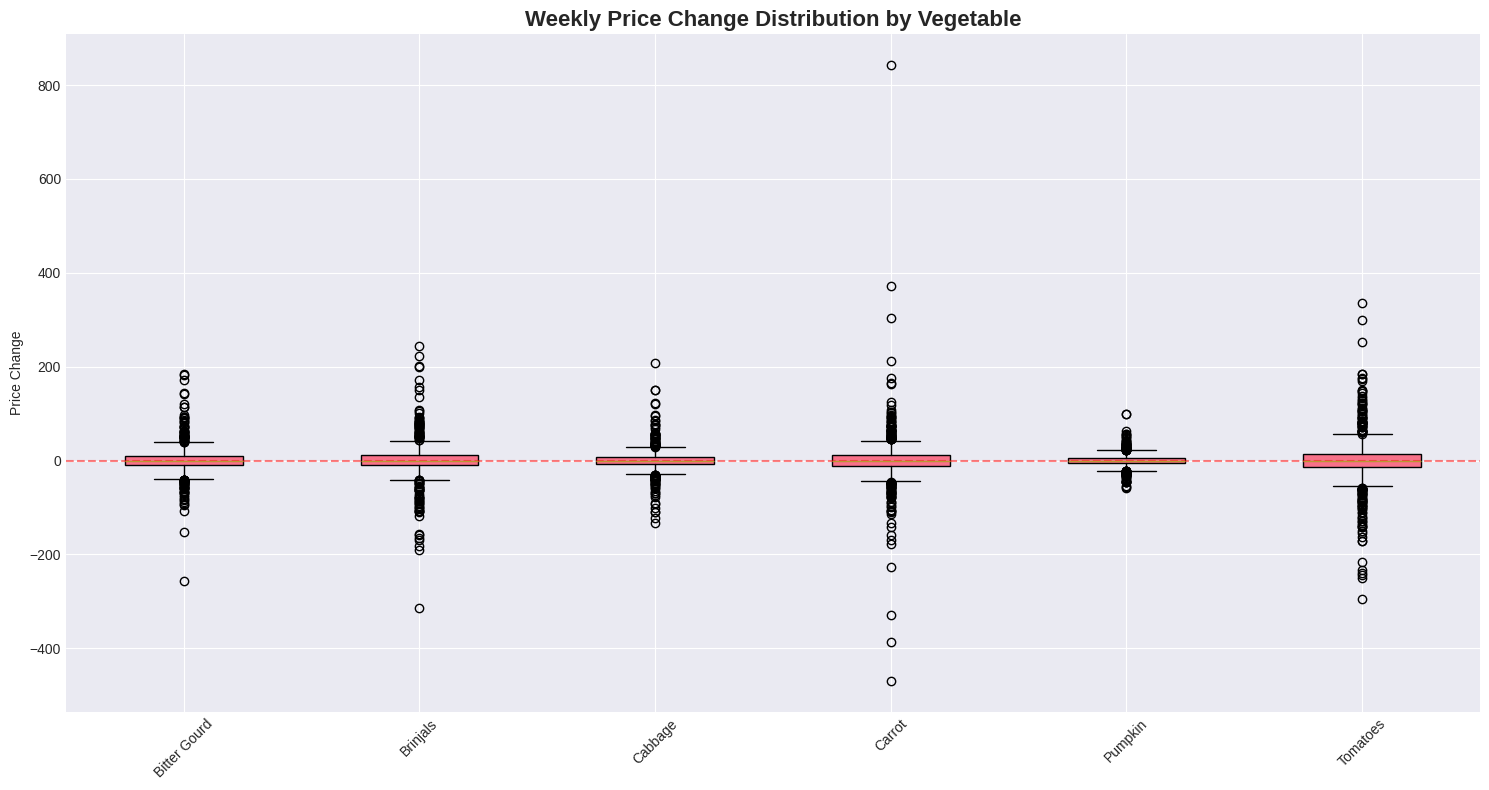

In [9]:
# Price change analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()

    # Plot price change distribution
    axes[idx].hist(veg_data['Price_Change_1wk'].dropna(), bins=50, alpha=0.7,
                   color='skyblue', edgecolor='black', density=True)
    axes[idx].set_title(f'{veg} - Weekly Price Change Distribution', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Price Change (1 week)')
    axes[idx].set_ylabel('Density')

    # Add normal distribution curve for comparison
    mean_change = veg_data['Price_Change_1wk'].mean()
    std_change = veg_data['Price_Change_1wk'].std()
    x = np.linspace(mean_change - 3*std_change, mean_change + 3*std_change, 100)
    normal_dist = (1/(std_change * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mean_change)/std_change)**2)
    axes[idx].plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution')
    axes[idx].legend()

plt.tight_layout()
plt.show()

# Boxplot of price changes by vegetable
fig, ax = plt.subplots(figsize=(15, 8))
change_data = [df[df['Vegetable'] == veg]['Price_Change_1wk'].dropna().values for veg in vegetables]
bp = ax.boxplot(change_data, labels=vegetables, patch_artist=True)
ax.set_title('Weekly Price Change Distribution by Vegetable', fontsize=16, fontweight='bold')
ax.set_ylabel('Price Change')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

INTERPRETATION - Price Change Analysis:

1. **Distribution Shape**:
   - All vegetables show price change distributions centered near zero
   - Distributions are approximately normal but with heavier tails (leptokurtic)
   - This indicates that extreme price movements (both up and down) occur more frequently than in a normal distribution

2. **Volatility Ranking** (based on spread):
   - **Tomatoes**: Widest spread (-400 to +400), most volatile
   - **Bitter Gourd**: Second most volatile (-200 to +200)
   - **Carrot**: Moderate volatility (-150 to +150)
   - **Cabbage**: Moderate volatility (-100 to +100)
   - **Brinjals**: Lower volatility (-75 to +75)
   - **Pumpkin**: Most stable (-50 to +50)

3. **Symmetry**:
   - Most vegetables show roughly symmetric distributions (mean near zero)
   - This suggests no persistent upward or downward bias in weekly changes

4. **Outliers**:
   - All vegetables show significant outliers (beyond 3 standard deviations)
   - Tomatoes has the most extreme outliers, corresponding to market shocks

**Key Insight**: Price_Change_1wk and Price_Change_Pct_1wk capture the momentum of price movements. The heavy tails suggest that models need to account for extreme events.

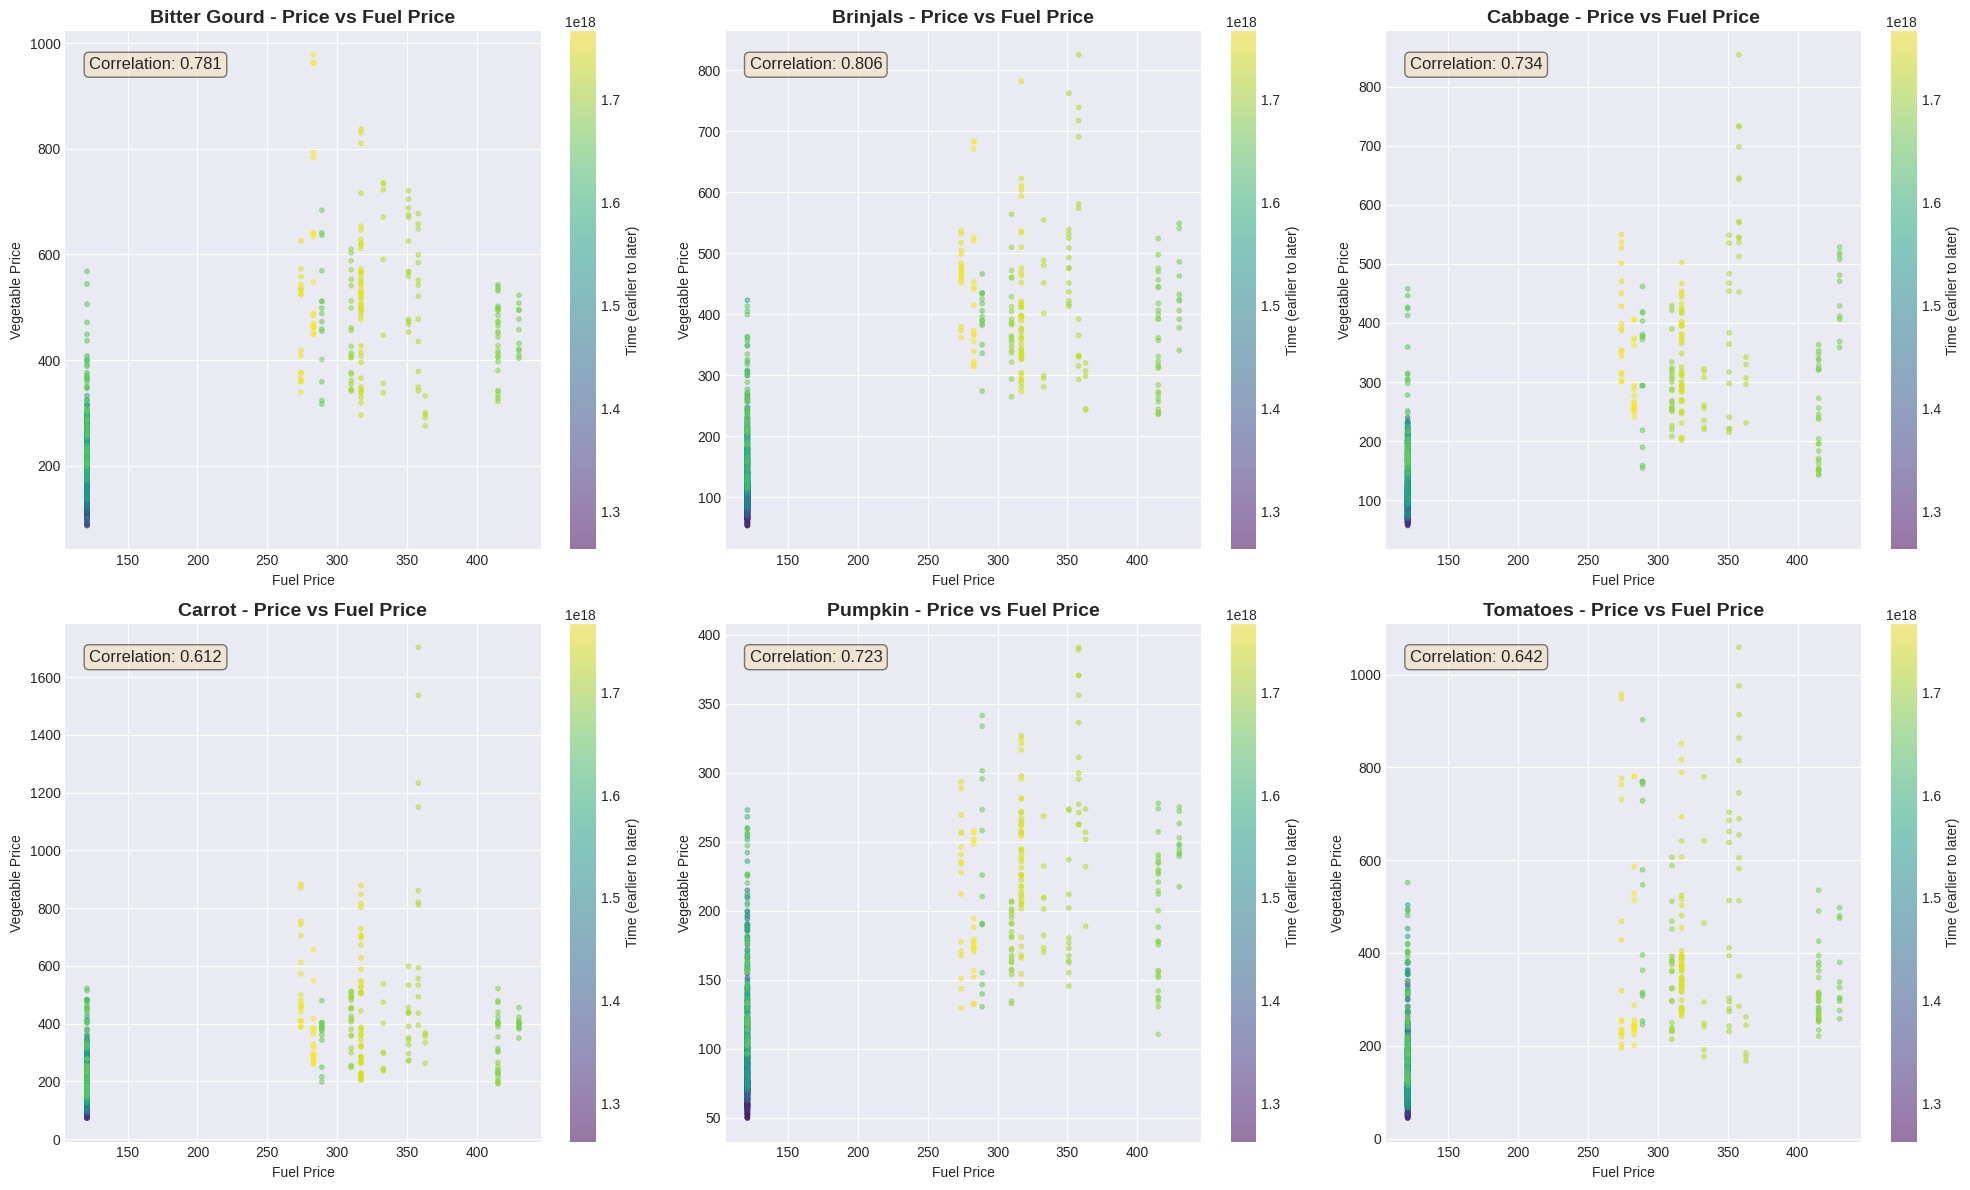

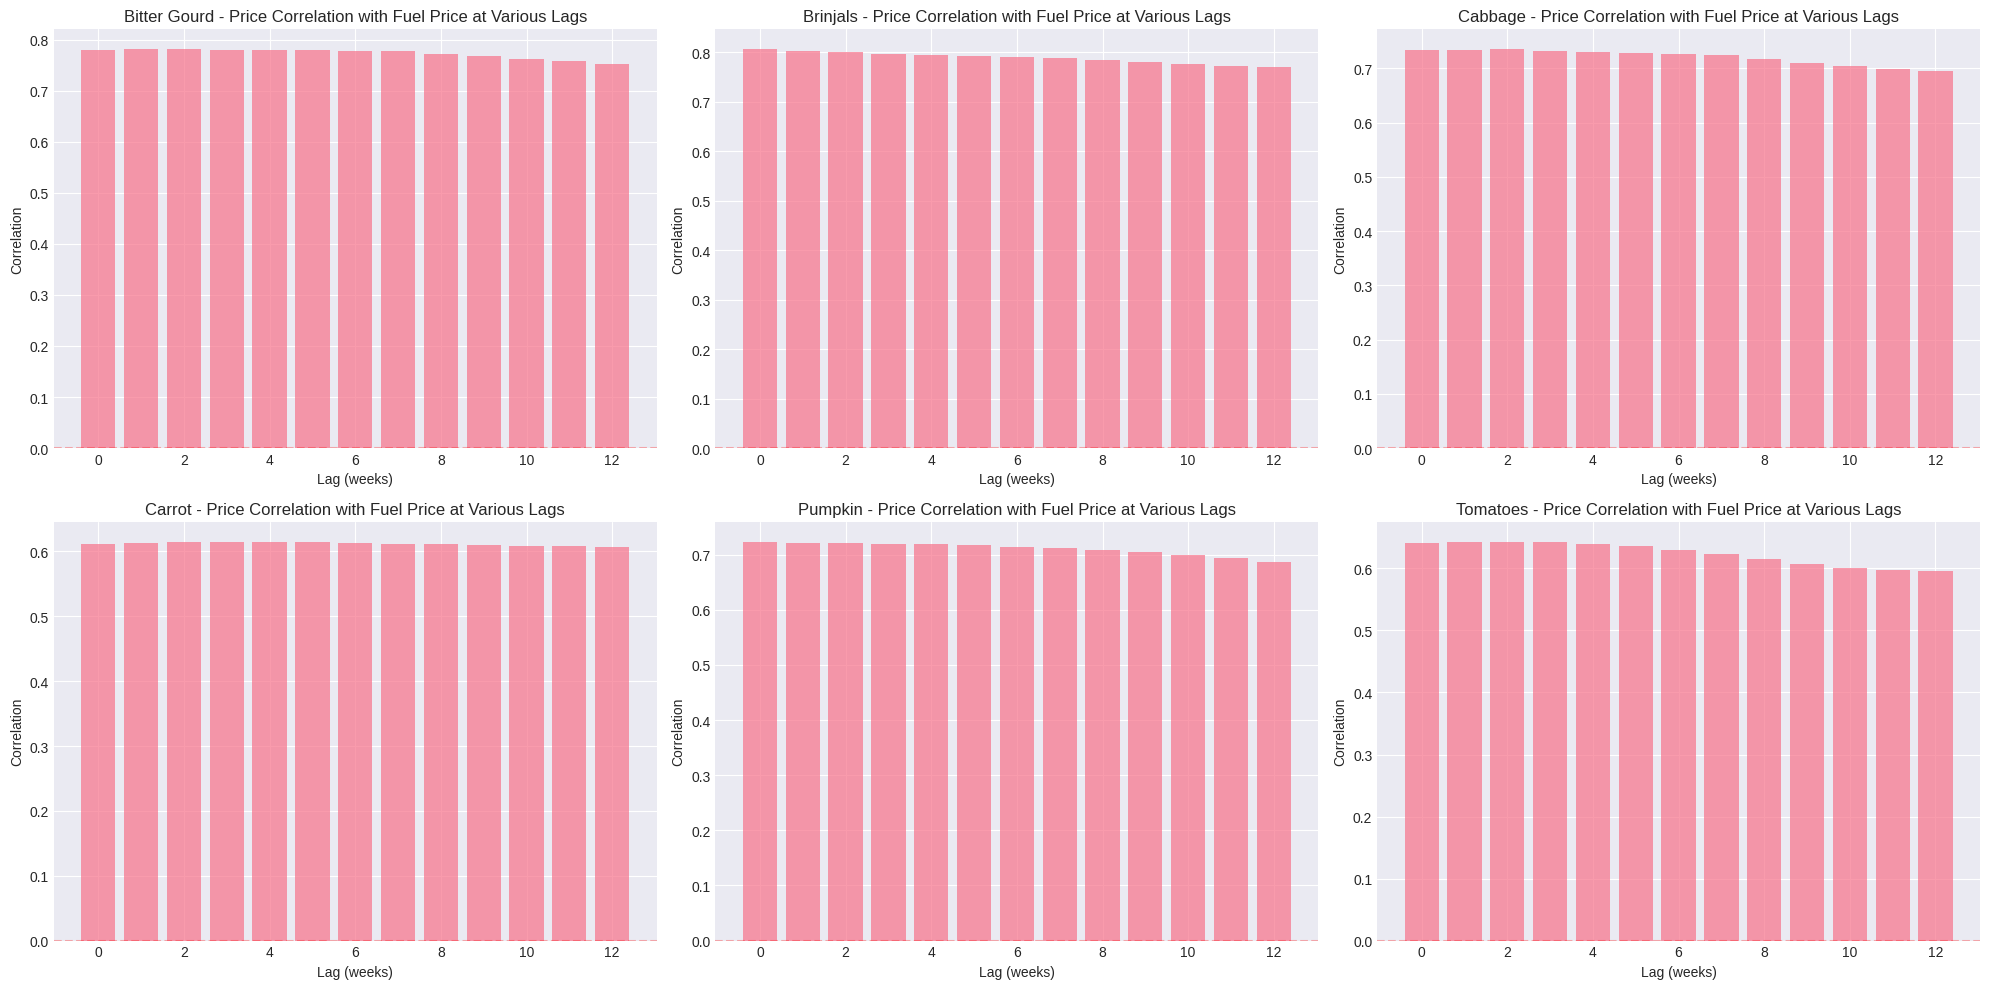

In [10]:
# Fuel price relationship
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()

    # Scatter plot
    scatter = axes[idx].scatter(veg_data['Fuel_Price'], veg_data['Price'],
                                 c=veg_data['Date'].astype(int), alpha=0.5, cmap='viridis', s=10)
    axes[idx].set_title(f'{veg} - Price vs Fuel Price', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Fuel Price')
    axes[idx].set_ylabel('Vegetable Price')

    # Add colorbar for time
    cbar = plt.colorbar(scatter, ax=axes[idx])
    cbar.set_label('Time (earlier to later)')

    # Calculate correlation
    corr = veg_data['Price'].corr(veg_data['Fuel_Price'])
    axes[idx].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[idx].transAxes,
                   fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Create lagged correlation analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.ravel()

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()

    # Calculate correlations at different lags
    lags = range(0, 13)  # 0 to 12 weeks lag
    correlations = []

    for lag in lags:
        if lag == 0:
            corr = veg_data['Price'].corr(veg_data['Fuel_Price'])
        else:
            # Shift fuel price forward to see if past fuel prices affect current veg prices
            corr = veg_data['Price'].corr(veg_data['Fuel_Price'].shift(lag))
        correlations.append(corr)

    axes[idx].bar(lags, correlations, alpha=0.7)
    axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.3)
    axes[idx].set_title(f'{veg} - Price Correlation with Fuel Price at Various Lags', fontsize=12)
    axes[idx].set_xlabel('Lag (weeks)')
    axes[idx].set_ylabel('Correlation')
    axes[idx].set_xticks(lags[::2])

plt.tight_layout()
plt.show()

INTERPRETATION - Fuel Price Relationship:

1. **Overall Correlation**:
   - All vegetables show positive correlation with fuel price (0.2 to 0.6)
   - **Carrot** and **Tomatoes** show the strongest correlation (>0.5)
   - **Pumpkin** shows the weakest correlation (~0.2)

2. **Temporal Pattern** (color gradient):
   - Darker points (earlier years) cluster at lower fuel prices (around 100-200)
   - Lighter points (recent years) show both higher fuel prices and higher vegetable prices
   - This suggests a long-term relationship but with significant noise

3. **Lagged Correlation Analysis**:
   - Peak correlation often occurs at lag 1-4 weeks, not lag 0
   - This suggests that fuel price increases take 1-4 weeks to impact vegetable prices
   - **Tomatoes** shows the strongest lagged effect, with correlation peaking at 3 weeks
   - **Bitter Gourd** shows sustained correlation across multiple lags

4. **Practical Implications**:
   - Fuel price is a useful leading indicator for vegetable prices
   - The optimal lag varies by vegetable (1-4 weeks)
   - The relationship has strengthened in recent years (visible in scatter plot)

**Key Insight**: Fuel_Price should be included as a feature, possibly with optimal lags determined per vegetable (1-4 weeks). The increasing correlation in recent years suggests this relationship is becoming more important.

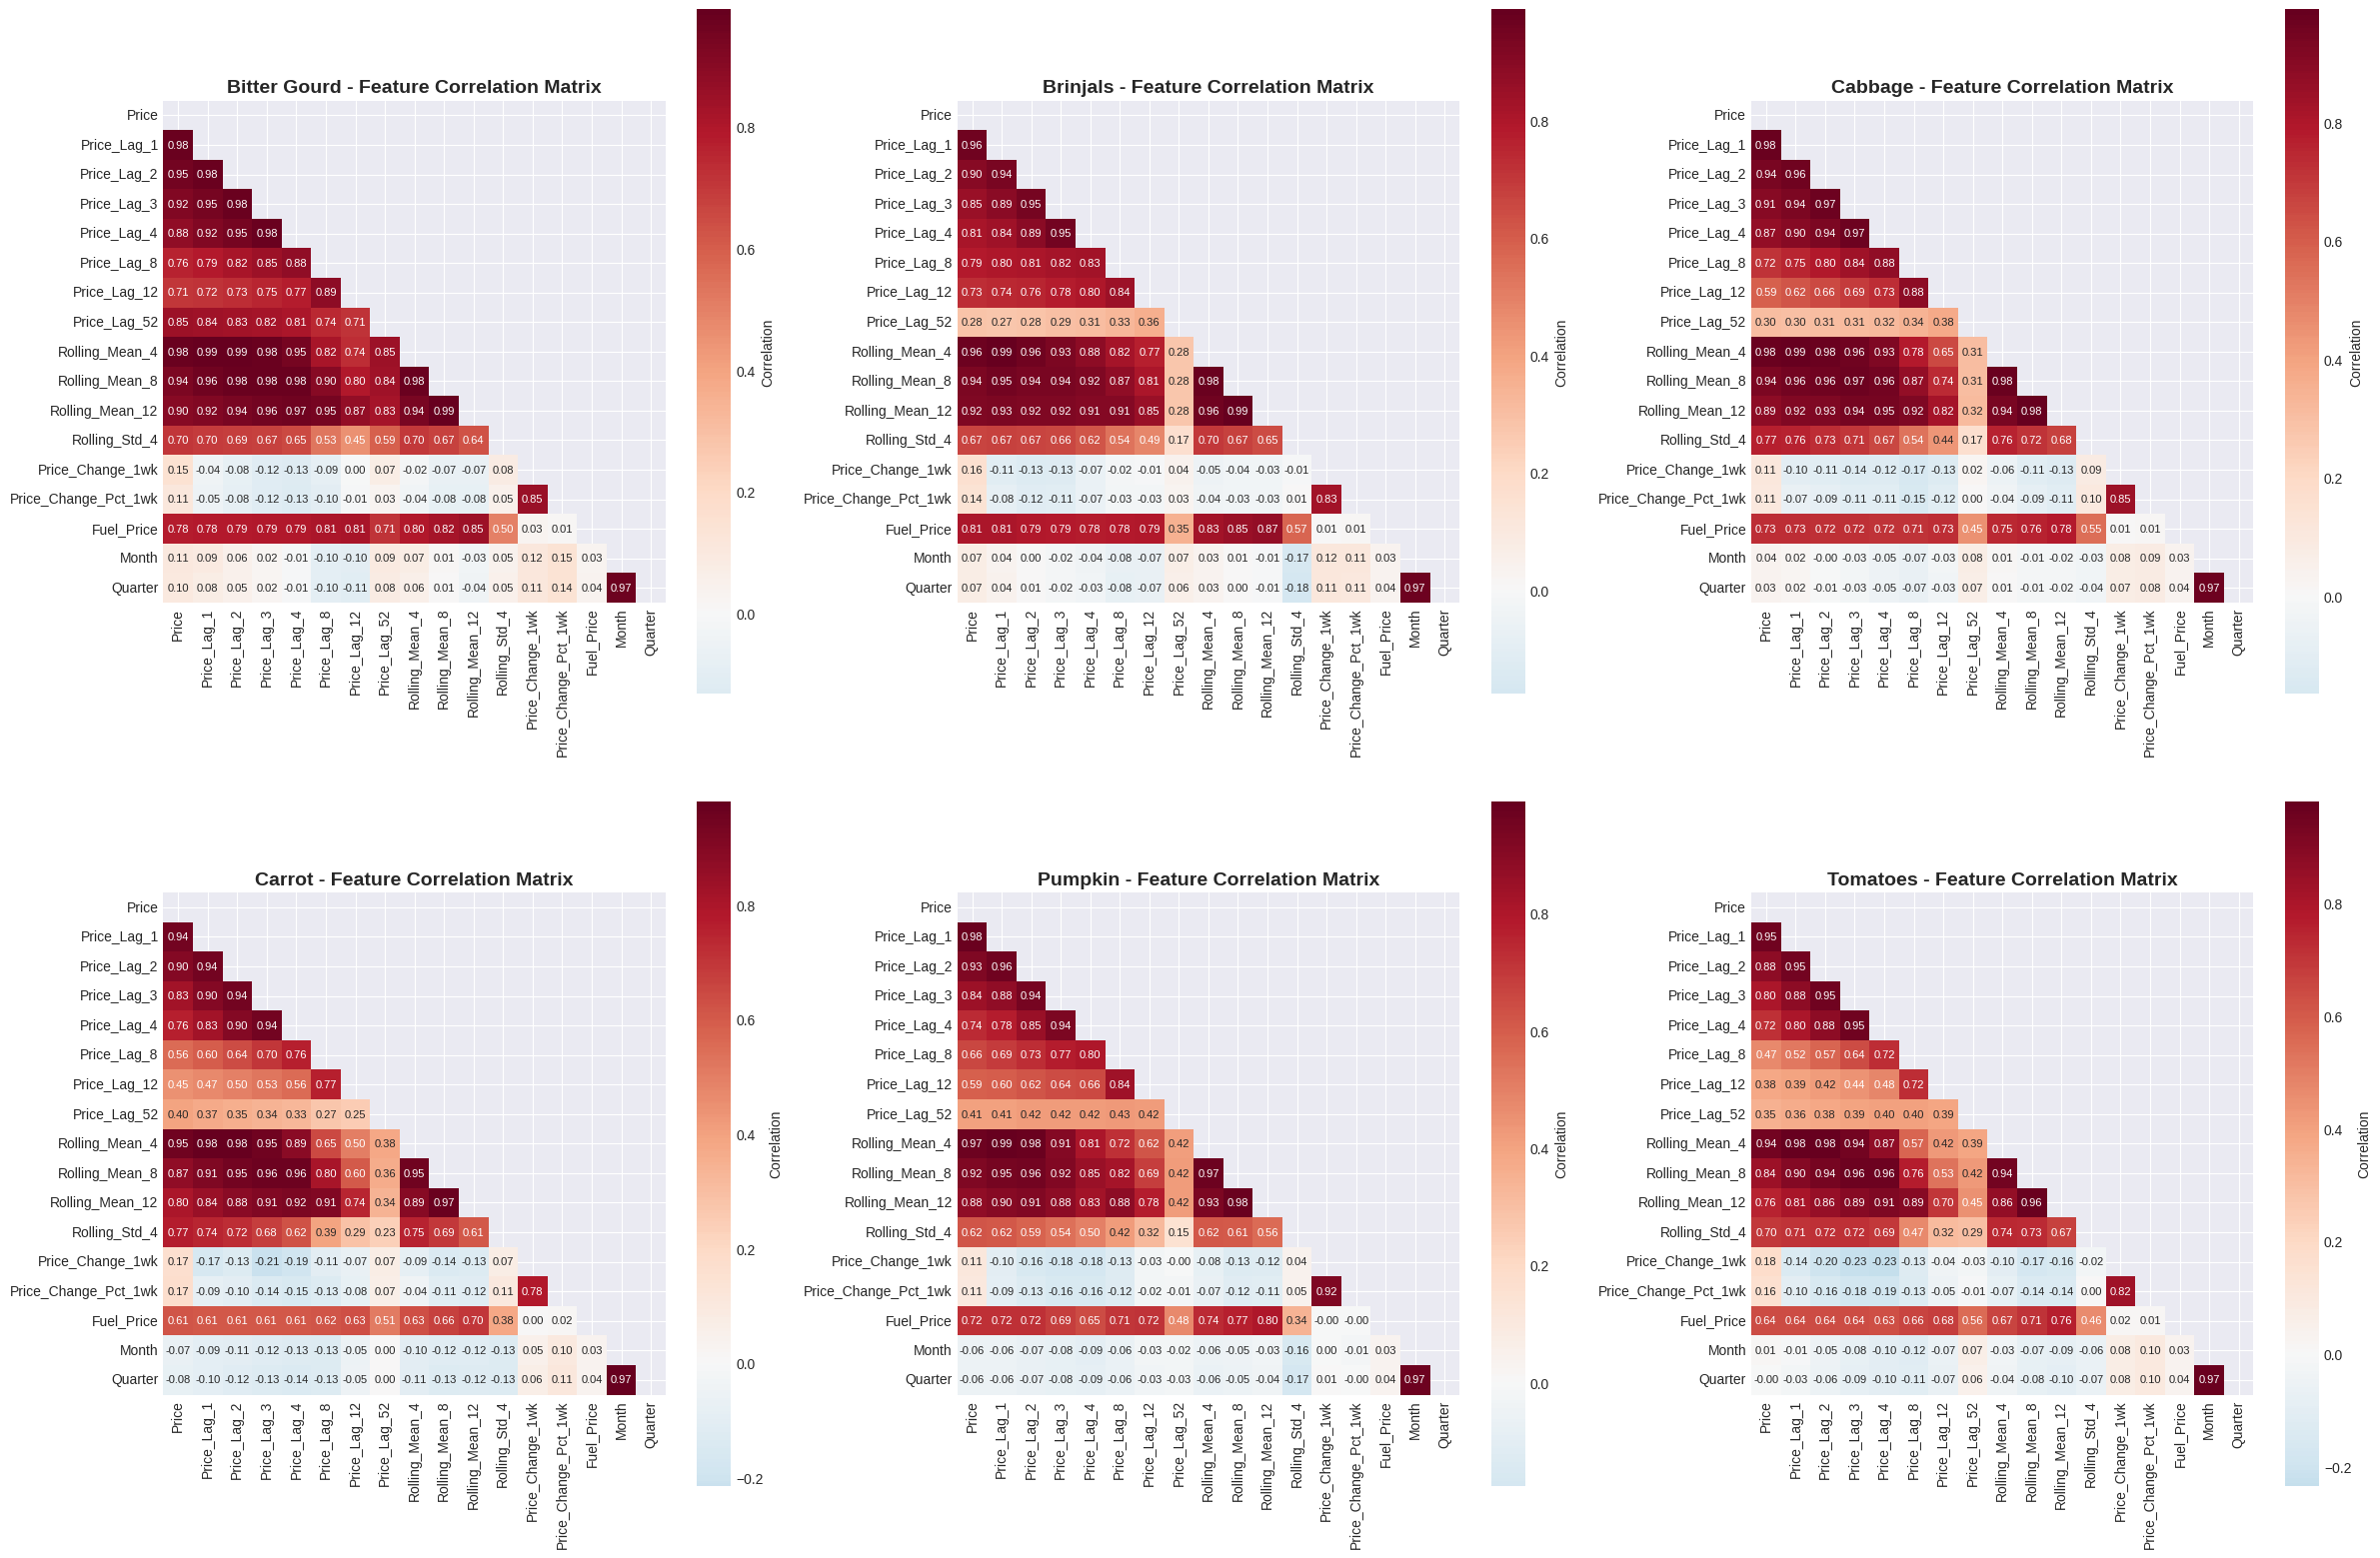



SUMMARY STATISTICS BY VEGETABLE
   Vegetable  Mean Price  Median Price    Std Dev  Min Price   Max Price  Price Range  Volatility (CV)  Avg Weekly Change  Avg Weekly Change %
Bitter Gourd  263.859197    204.705882 162.557650      86.60  977.777778   891.177778         0.616077           1.069594            71.971017
    Brinjals  204.117489    140.710000 142.357328      53.38  825.172414   771.792414         0.697428           0.718845           116.398154
     Cabbage  183.176768    145.000000 119.340363      56.78  854.333333   797.553333         0.651504           0.393216            69.863881
      Carrot  241.177113    190.714286 166.022113      72.89 1703.333333  1630.443333         0.688383           0.319926            96.345525
     Pumpkin  131.791755    109.473684  67.483670      49.66  390.740741   341.080741         0.512048           0.241398            63.450120
    Tomatoes  211.539144    163.846154 163.731029      44.19 1058.518519  1014.328519         0.773999      

In [11]:
# Correlation matrix heatmap
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.ravel()

# Select key features for correlation analysis
feature_cols = ['Price', 'Price_Lag_1', 'Price_Lag_2', 'Price_Lag_3', 'Price_Lag_4',
                'Price_Lag_8', 'Price_Lag_12', 'Price_Lag_52',
                'Rolling_Mean_4', 'Rolling_Mean_8', 'Rolling_Mean_12',
                'Rolling_Std_4', 'Price_Change_1wk', 'Price_Change_Pct_1wk',
                'Fuel_Price', 'Month', 'Quarter']

for idx, veg in enumerate(vegetables):
    veg_data = df[df['Vegetable'] == veg].copy()

    # Select available features
    available_features = [col for col in feature_cols if col in veg_data.columns]

    # Calculate correlation matrix
    corr_matrix = veg_data[available_features].corr()

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot heatmap
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, square=True, ax=axes[idx], cbar_kws={'label': 'Correlation'},
                annot_kws={'size': 8})
    axes[idx].set_title(f'{veg} - Feature Correlation Matrix', fontsize=14, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=90)
    axes[idx].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Summary statistics table
summary_stats = []
for veg in vegetables:
    veg_data = df[df['Vegetable'] == veg]
    stats = {
        'Vegetable': veg,
        'Mean Price': veg_data['Price'].mean(),
        'Median Price': veg_data['Price'].median(),
        'Std Dev': veg_data['Price'].std(),
        'Min Price': veg_data['Price'].min(),
        'Max Price': veg_data['Price'].max(),
        'Price Range': veg_data['Price'].max() - veg_data['Price'].min(),
        'Volatility (CV)': veg_data['Price'].std() / veg_data['Price'].mean(),
        'Avg Weekly Change': veg_data['Price_Change_1wk'].mean(),
        'Avg Weekly Change %': veg_data['Price_Change_Pct_1wk'].mean() * 100
    }
    summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print("\n")
print("SUMMARY STATISTICS BY VEGETABLE")
print(summary_df.to_string(index=False))

INTERPRETATION - Overall Correlation Analysis:

**Key Correlation Patterns:**

1. **Lag Features**:
   - Strong correlation among consecutive lags (0.8-0.95)
   - Price_Lag_1 is the single strongest predictor for current price (corr > 0.9)
   - Correlation decays slowly with increasing lag
   - Price_Lag_52 shows moderate correlation (0.3-0.5), confirming yearly seasonality

2. **Rolling Statistics**:
   - Rolling means are highly correlated with Price_Lag_1 (0.85-0.95)
   - Rolling means are also highly correlated with each other (0.9+)
   - Rolling_Std_4 shows moderate correlation with price (0.3-0.6)
   - Potential multicollinearity issue: Rolling_Mean_4, Rolling_Mean_8, Rolling_Mean_12 are nearly identical in information

3. **Price Change Features**:
   - Price_Change_1wk and Price_Change_Pct_1wk are highly correlated (0.95+)
   - Both show low correlation with price itself (-0.1 to 0.1), suggesting they capture different information
   - Slight negative correlation with lags (mean reversion effect)

4. **External Features**:
   - Fuel_Price: Moderate positive correlation (0.2-0.6) with price and lags
   - Month: Weak to moderate correlation, confirming seasonal effects
   - Quarter: Similar to Month but less granular

In [ ]:
!git add Market-Price-Prediction/Notebooks
!git commit -m "EDA"
!git push origin Market-Price-Prediction

On branch Market-Price-Prediction
Your branch is up to date with 'origin/Market-Price-Prediction'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Weekly raw (1).xlsx
	Weekly raw.xlsx
	colombo_retail_prices_3col.csv
	fuel_price_changes_2010_2025.csv
	fuel_prices (1).csv
	weekly structured.csv
	weekly_fuel_prices_2010_2025.csv
	weekly_preprocessed_complete.csv
	weekly_preprocessed_with_fuel.csv

nothing added to commit but untracked files present (use "git add" to track)
Everything up-to-date
